# Installing dependent libraries, and unzipping the audio files

In [1]:
!pip install thinkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for thinkx: filename=thinkx-1.1.3-py3-none-any.whl size=59941 sha256=a616a1b18abbbe7b1cbe13527fd21fd0355878882839714e3812dbf480fc22e0
  Stored in directory: /root/.cache/pip/wheels/7a/1c/92/76239dea82301273ba928c1e8950882b6afc1ce84029fd1f7b
Successfully built thinkx


In [2]:
!unzip train_test.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_audio/go/a1cff772_nohash_0.wav  
  inflating: train_audio/go/a1cff772_nohash_2.wav  
  inflating: train_audio/go/a1cff772_nohash_3.wav  
  inflating: train_audio/go/a1cff772_nohash_4.wav  
  inflating: train_audio/go/a2fefcb4_nohash_0.wav  
  inflating: train_audio/go/a3502f15_nohash_0.wav  
  inflating: train_audio/go/a3502f15_nohash_2.wav  
  inflating: train_audio/go/a3fc7884_nohash_0.wav  
  inflating: train_audio/go/a3fc7884_nohash_1.wav  
  inflating: train_audio/go/a4ca3afe_nohash_0.wav  
  inflating: train_audio/go/a518d1cf_nohash_0.wav  
  inflating: train_audio/go/a6d586b7_nohash_3.wav  
  inflating: train_audio/go/a74f3917_nohash_1.wav  
  inflating: train_audio/go/a7545b9f_nohash_0.wav  
  inflating: train_audio/go/a759efbc_nohash_1.wav  
  inflating: train_audio/go/a84dee7b_nohash_0.wav  
  inflating: train_audio/go/a879a2c3_nohash_0.wav  
  inflating: train_audio/go/a879a2c3_nohash_2.wav  
  inflating: 

In [3]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Generate an empty directory to store the noised data

In [4]:
import os
os.mkdir("/content/generated_test_audio")

# Exploratory ananlysis
## Function for plots for analysis of waveform, spectrogram, and spectrum

In [1]:
import matplotlib.pyplot as plt
from thinkdsp import Wave, Spectrum

def plot_audio_analysis(wave: Wave, folder_name: str, file_name: str) -> None:
    """
    Plot the waveform, spectrum, and spectrogram of an audio file.

    Args:
        wave (Wave): The Wave object representing the audio file.
        folder_name (str): The name of the folder containing the audio file.
        file_name (str): The name of the audio file.

    Returns:
        None.
    """
    plt.figure(figsize=(15, 12))

    # Plot the waveform
    plt.subplot(3, 1, 1)
    wave.plot()
    plt.title(f'Waveform of {folder_name + "/" + file_name}')

    # Plot the spectrum
    plt.subplot(3, 1, 2)
    spectrum = wave.make_spectrum()
    spectrum.plot()
    plt.title(f'Spectrum of {folder_name + "/" + file_name}')

    # Plot the spectrogram
    plt.subplot(3, 1, 3)
    spectrogram = wave.make_spectrogram(seg_length=1024)
    spectrogram.plot(high=5000)
    plt.title(f'Spectrogram of {folder_name + "/" + file_name}')

    plt.tight_layout()
    plt.show()

### Function to count wav files in a folder

In [2]:
def count_wav_files(folder: str) -> int:
    """
    Count the number of .wav files in a given folder.

    Args:
        folder (str): The path to the folder.

    Returns:
        int: The number of .wav files in the folder.
    """
    count = 0
    for file in os.listdir(folder):
        if file.endswith('.wav'):
            count += 1
    return count

## Checking for total number of files

In [3]:
input_folder = '/content/test_audio'
output_folder = '/content/generated_test_audio'

In [5]:
import os
for subfolder in ['up', 'down', 'left', 'right', 'yes', 'no', 'stop', 'go']:
    input_subfolder = os.path.join(input_folder, subfolder)
    
    # Count .wav files in the subfolder
    total_files = count_wav_files(input_subfolder)
    print(f'Total .wav files in {subfolder}: {total_files}')

Total .wav files in up: 199
Total .wav files in down: 200
Total .wav files in left: 200
Total .wav files in right: 200
Total .wav files in yes: 200
Total .wav files in no: 200
Total .wav files in stop: 200
Total .wav files in go: 200


# Analysis by calling the plot function


In [8]:
import random
from thinkdsp import read_wave

def plot_to_analyze(input_folder: str, num_files_to_analyze: int) -> None:
  """
  Analyzes a random subset of audio files in each subfolder of the input folder and plots their audio analysis.

    Args:
        input_folder (str): Path of the folder containing subfolders with audio files.
        num_files_to_analyze (int): Number of audio files to analyze in each subfolder.

    Returns:
        None
  """

  for subfolder in ['up', 'down', 'left', 'right', 'yes', 'no', 'stop', 'go']:
      input_subfolder = os.path.join(input_folder, subfolder)
      
      # Count .wav files in the subfolder
      total_files = count_wav_files(input_subfolder)
      print(f'Total .wav files in {subfolder}: {total_files}')
      
      # Analyze a random subset of the audio files
      wav_files = [file for file in os.listdir(input_subfolder) if file.endswith('.wav')]
      random_sample = random.sample(wav_files, num_files_to_analyze)
      
      for file in random_sample:
          file_path = os.path.join(input_subfolder, file)
          wave = read_wave(file_path)
          plot_audio_analysis(wave, subfolder, file)

## For training samples with 1 sample per class

Total .wav files in up: 799


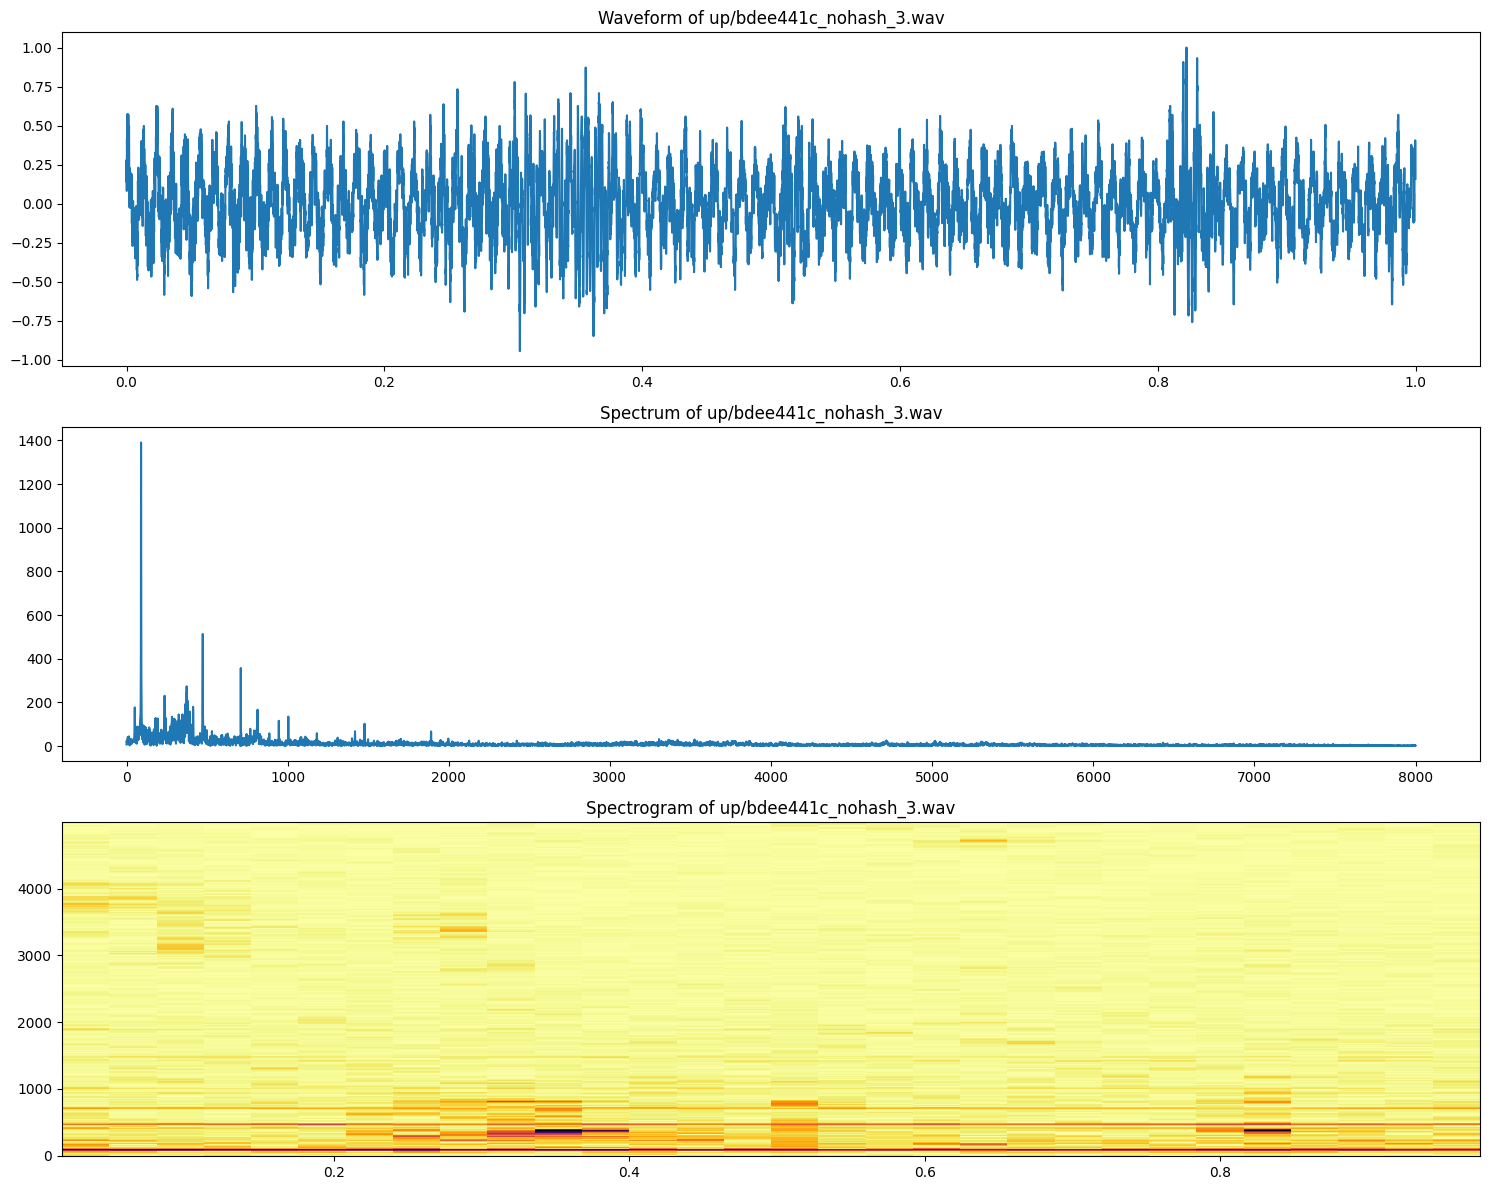

Total .wav files in down: 799


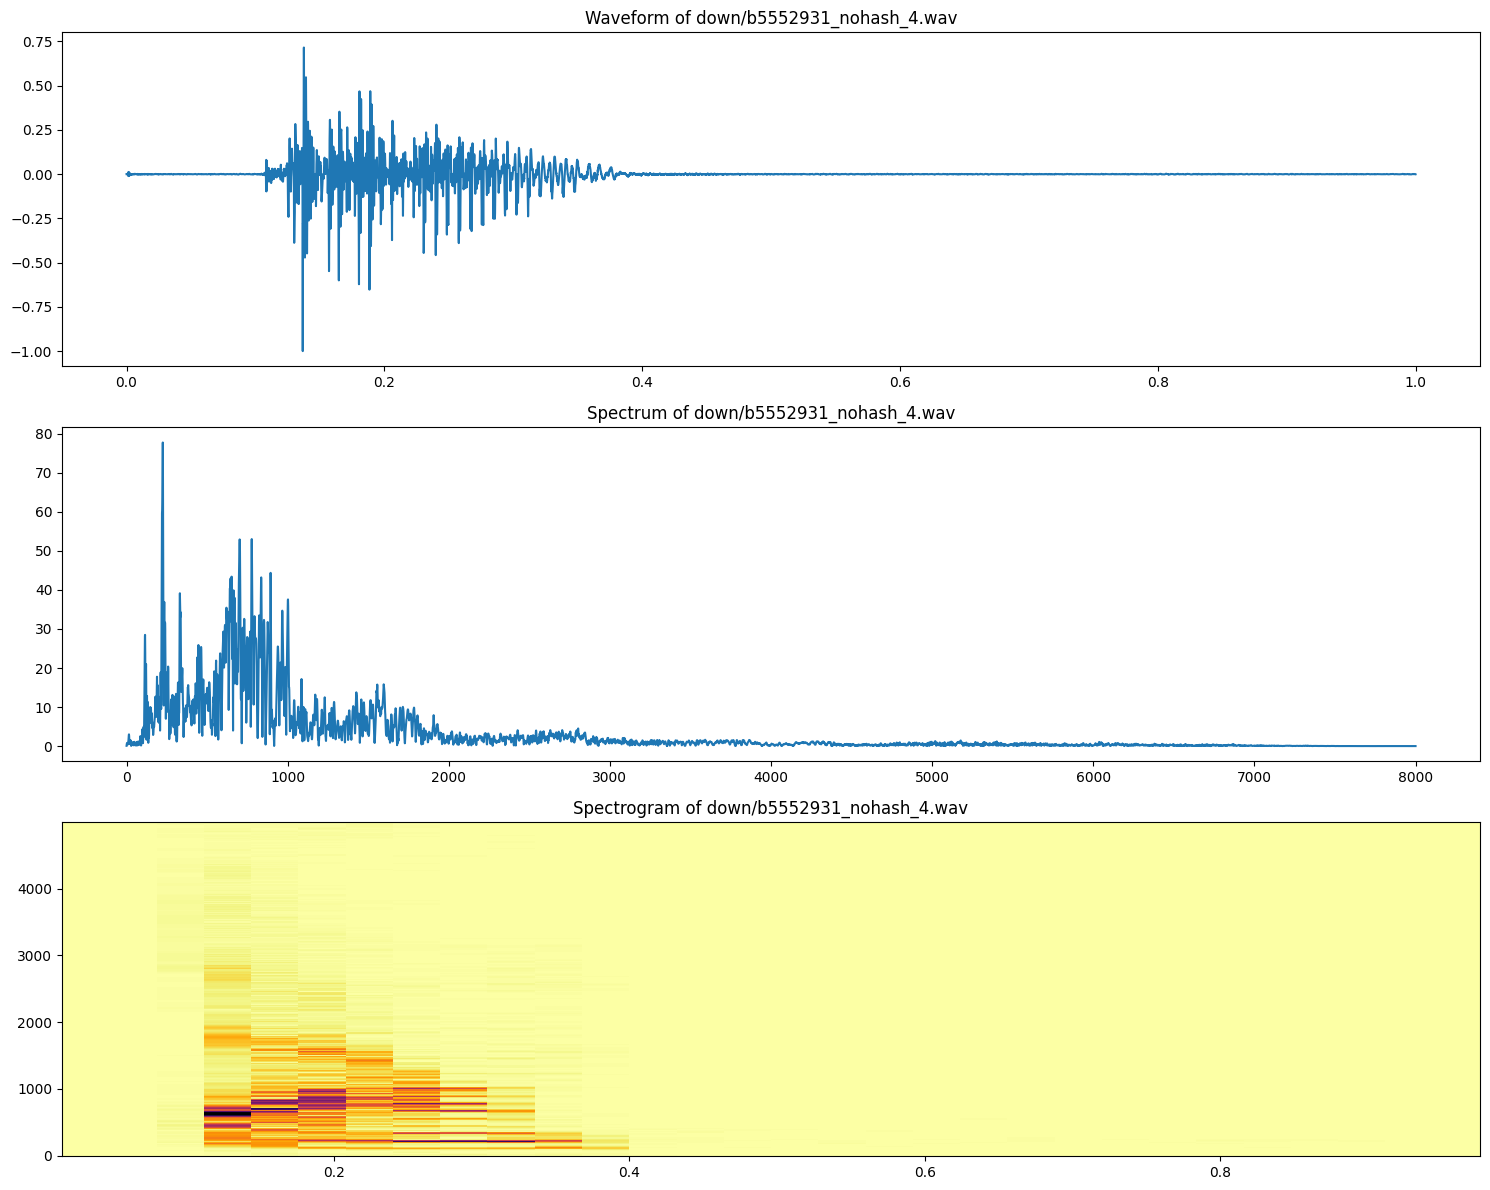

Total .wav files in left: 800


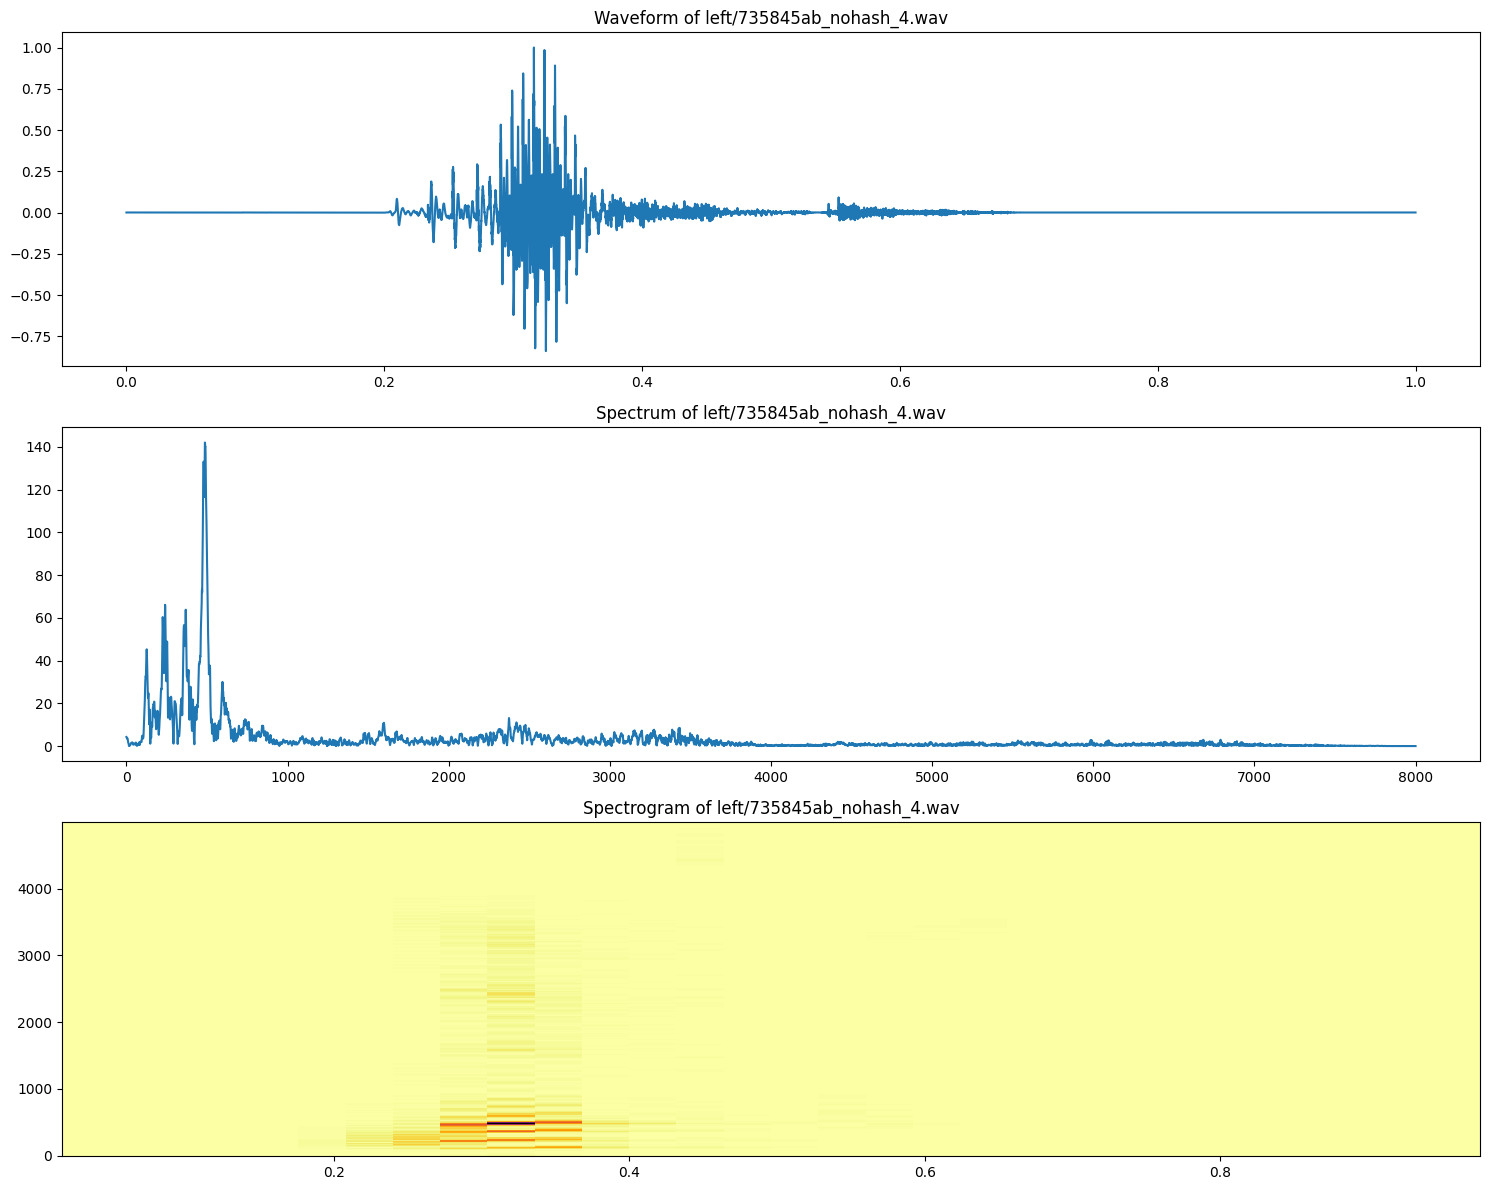

Total .wav files in right: 800


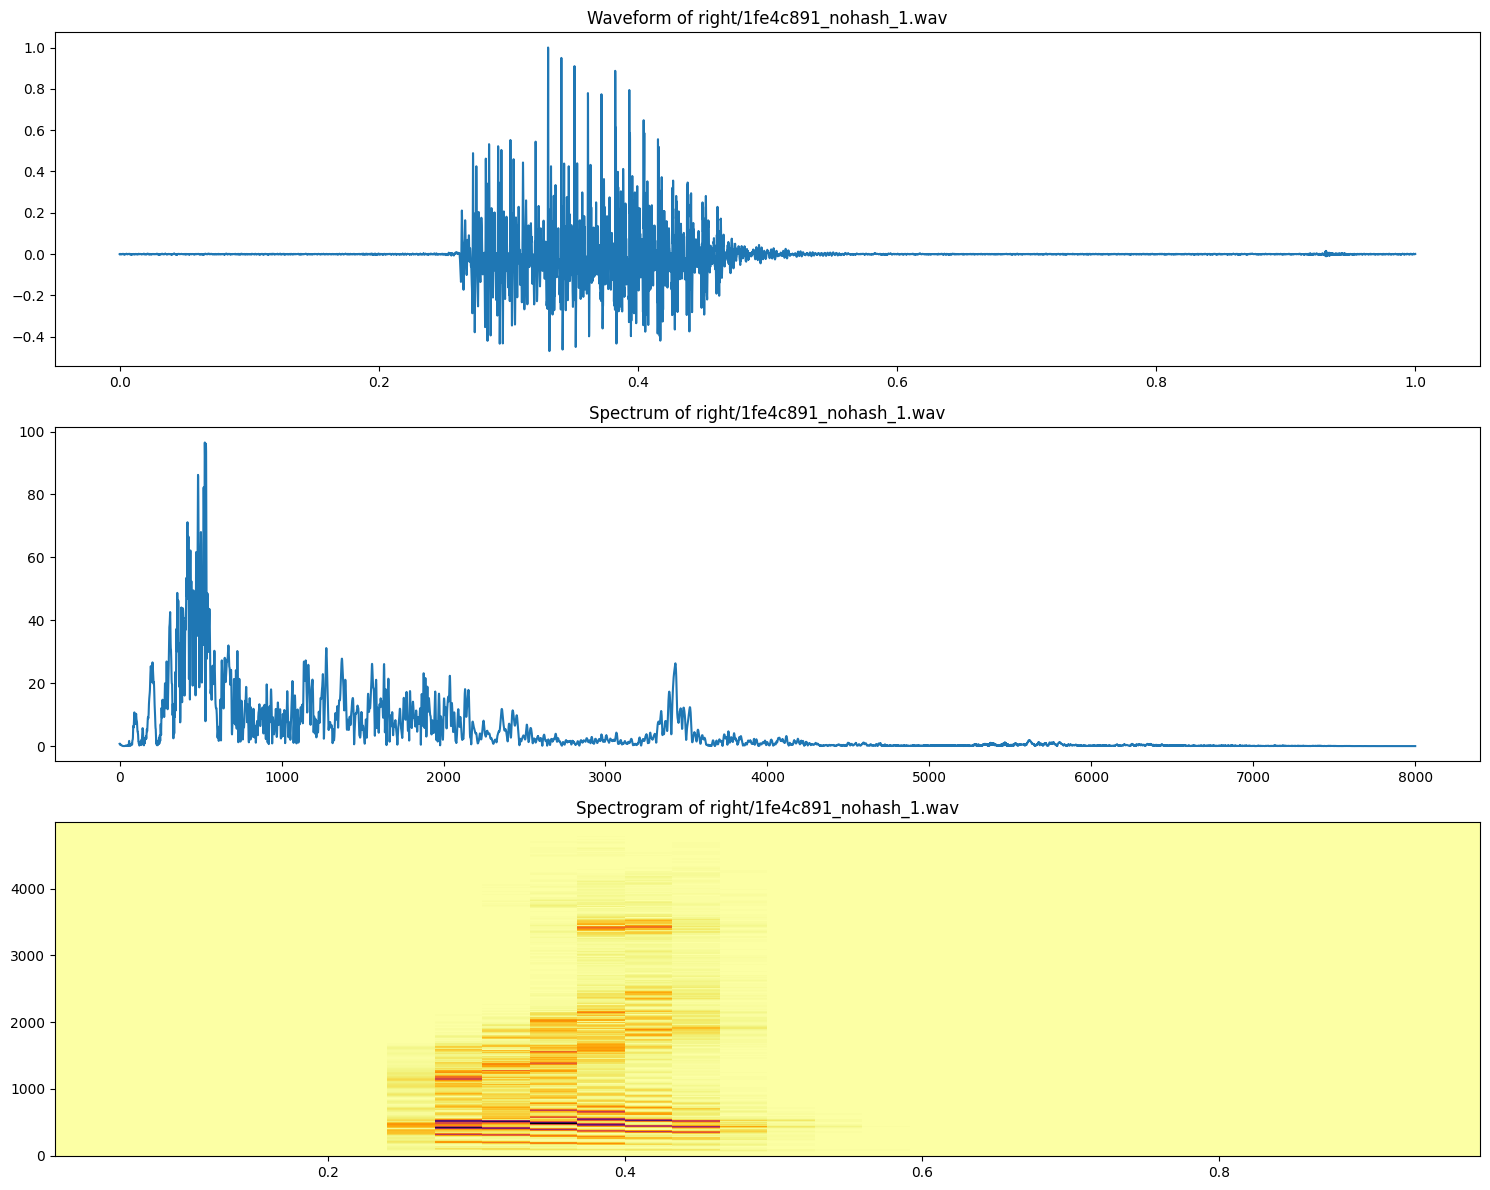

Total .wav files in yes: 800


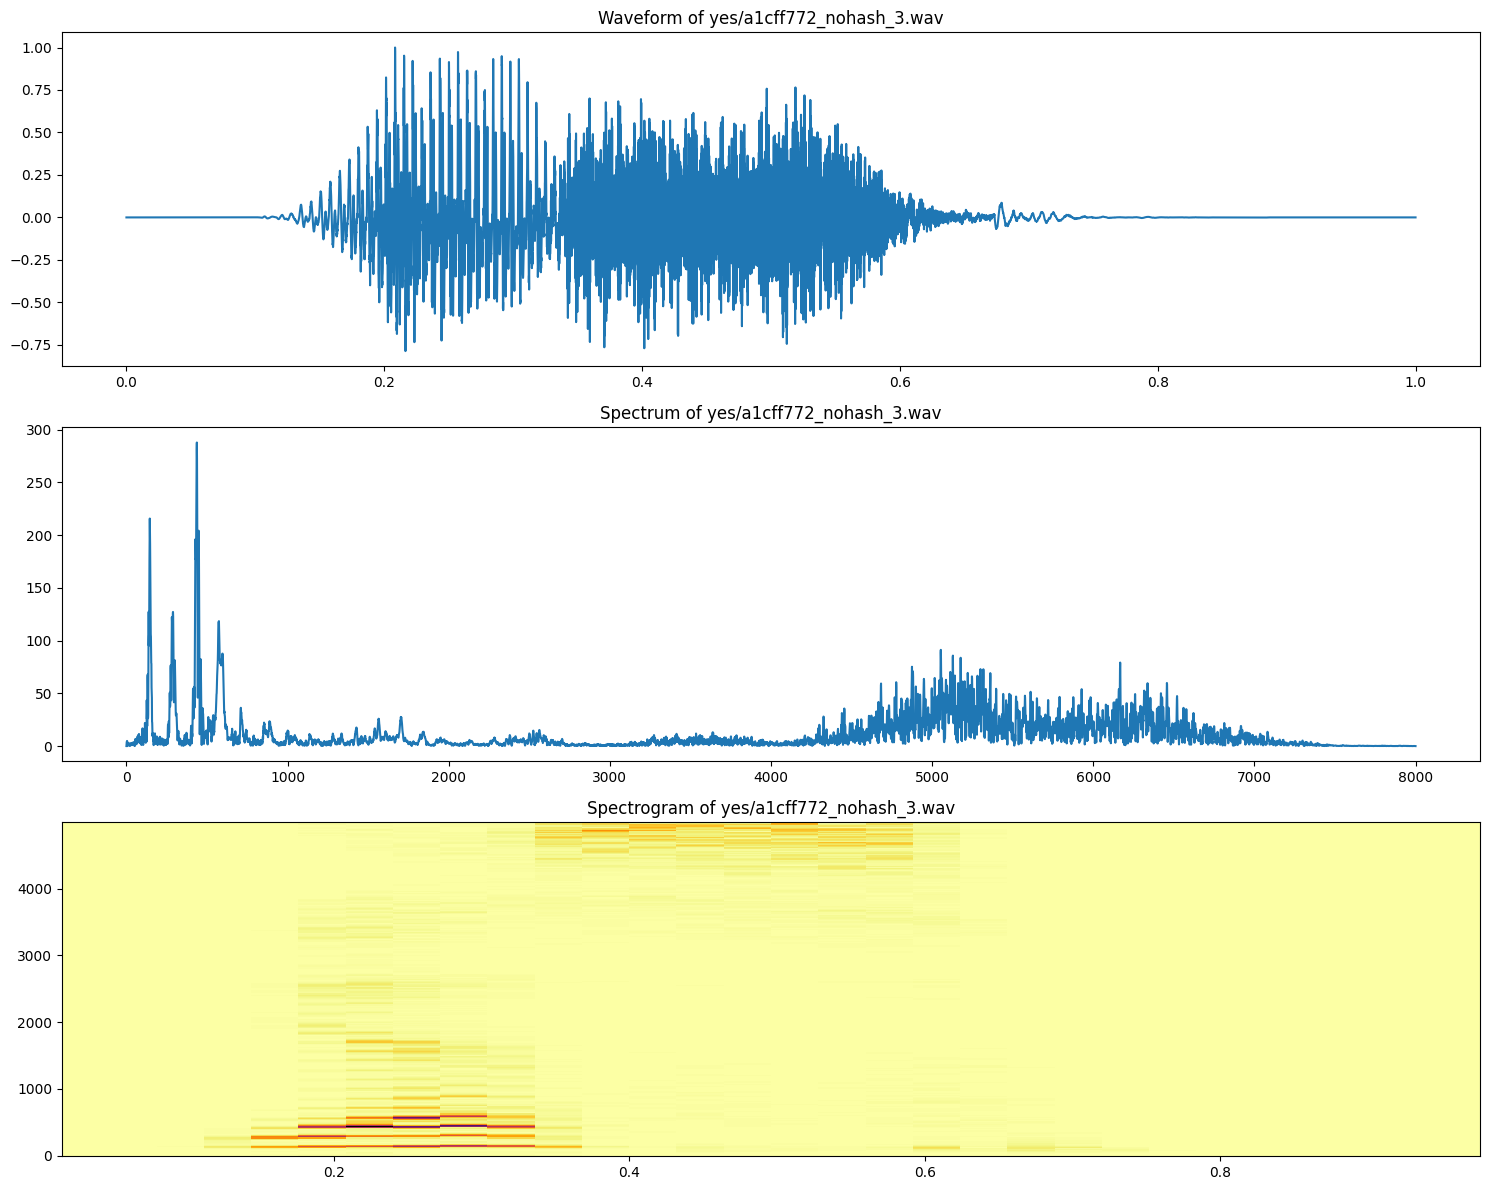

Total .wav files in no: 800


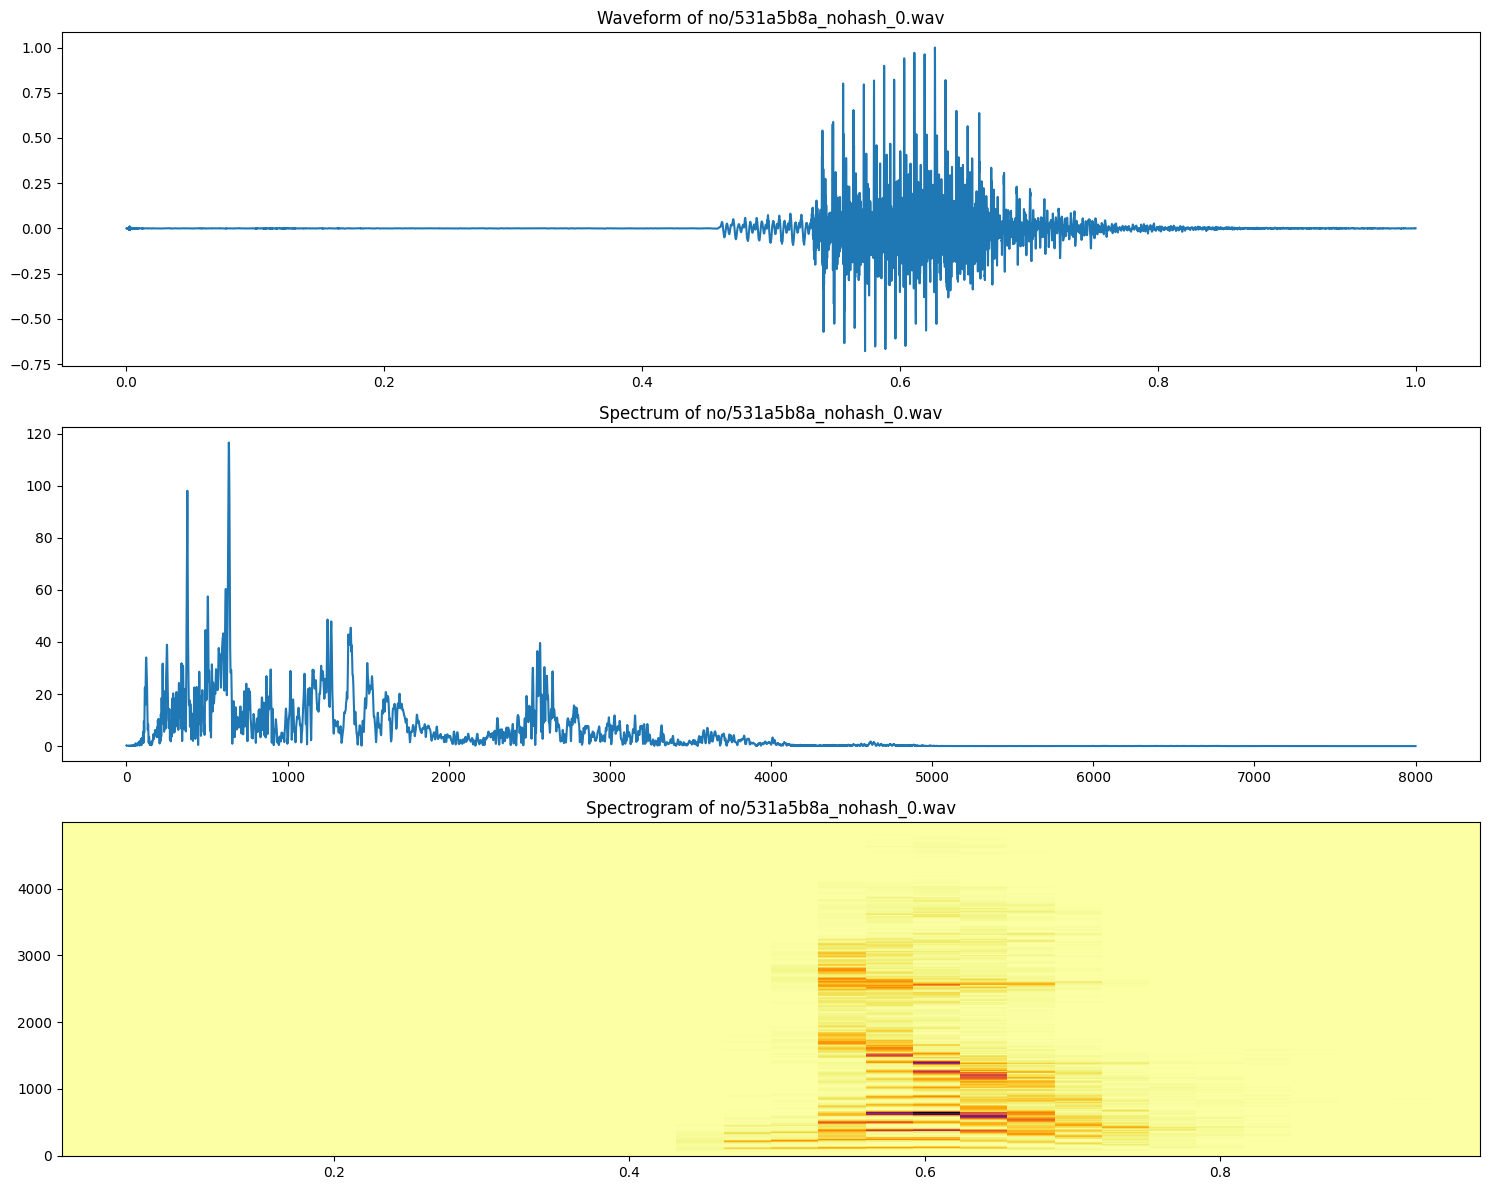

Total .wav files in stop: 800


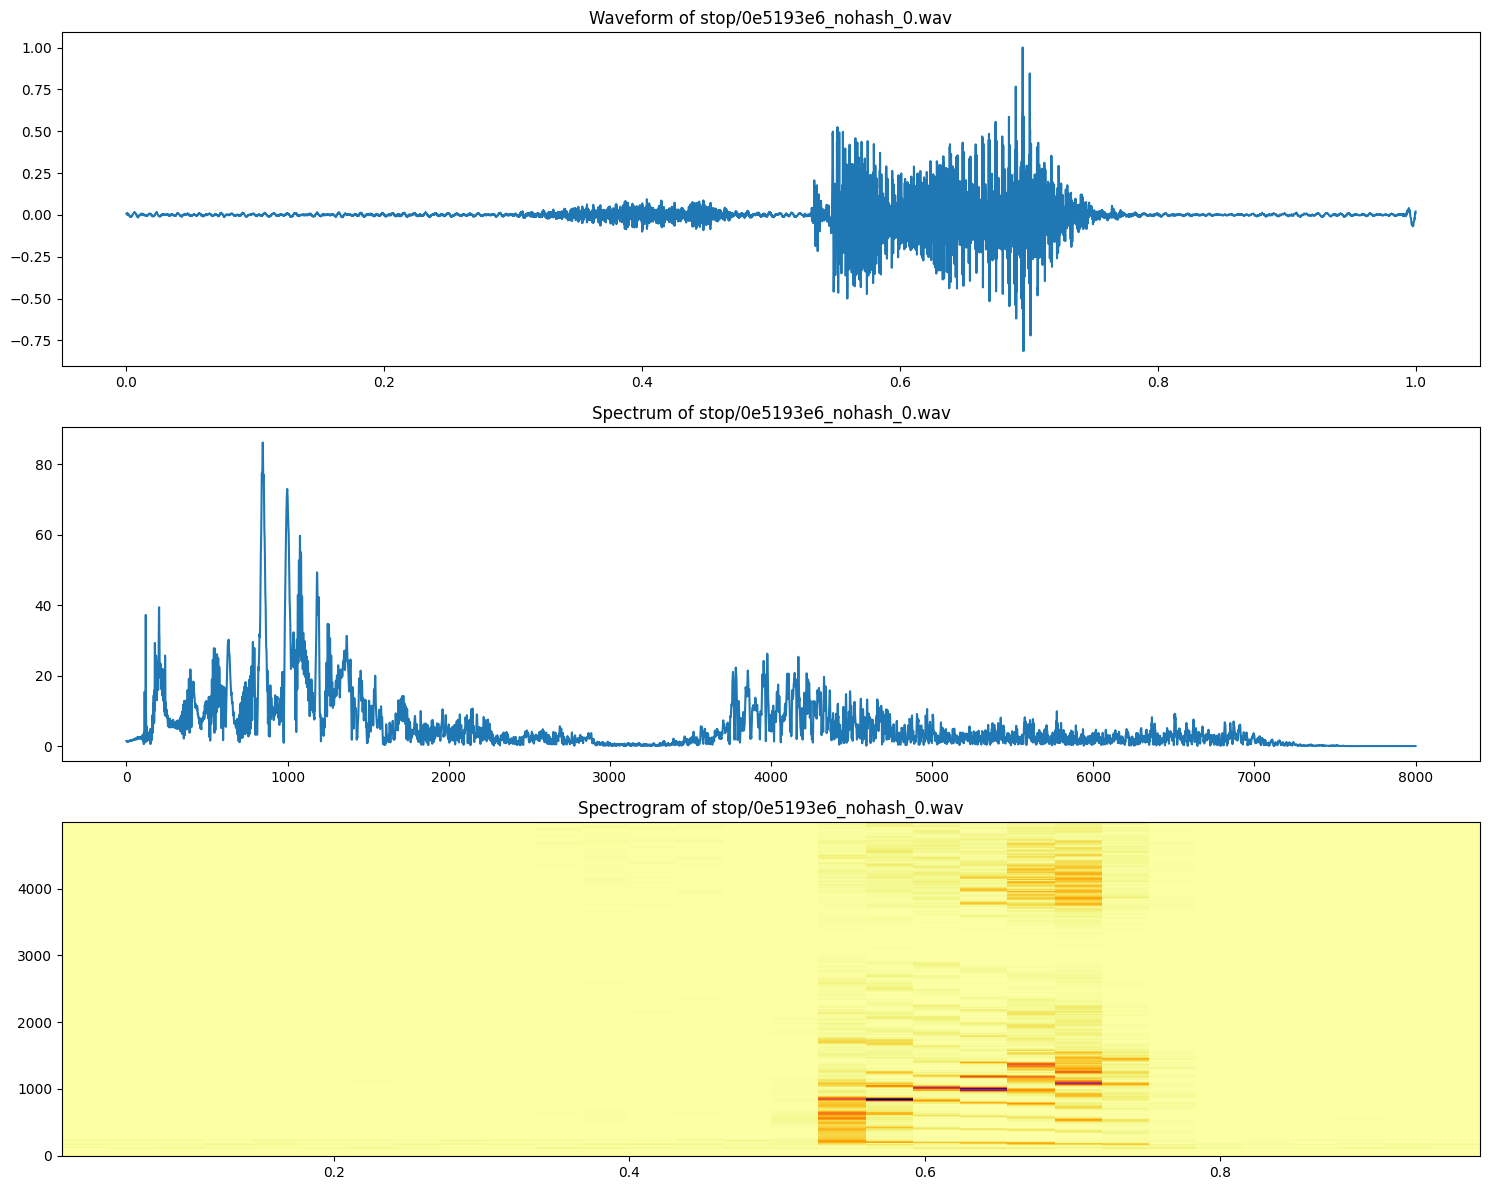

Total .wav files in go: 800


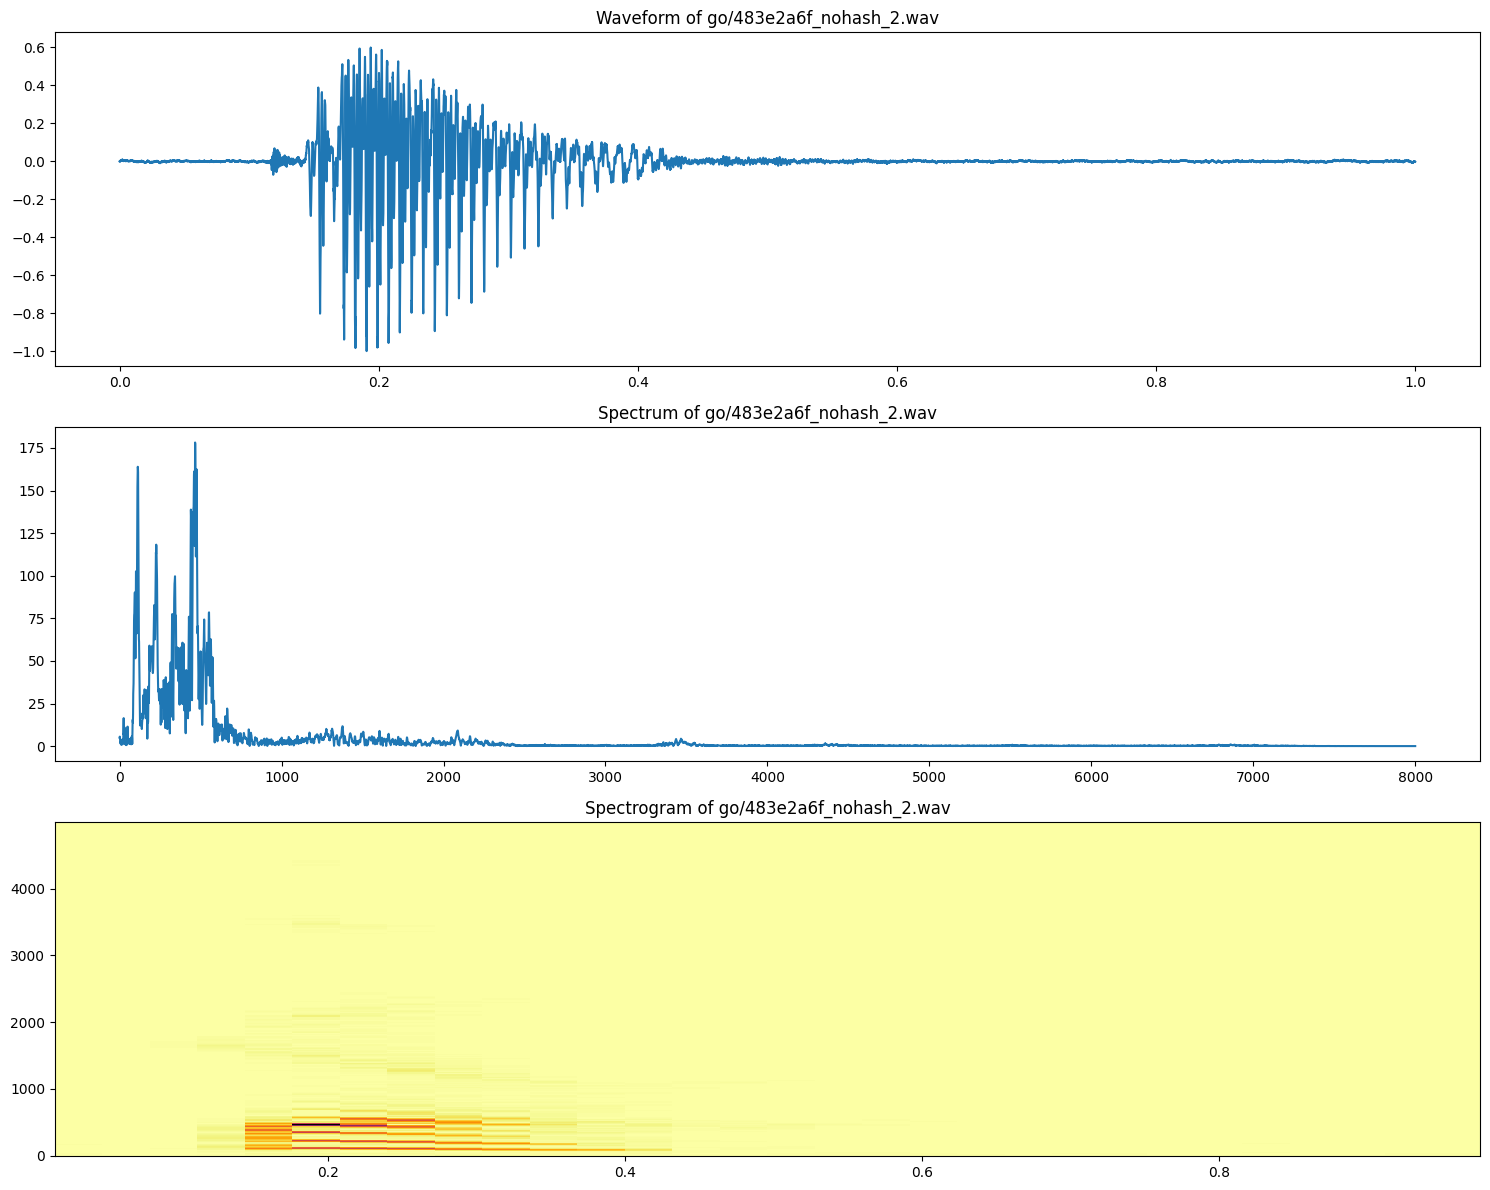

In [11]:
plot_to_analyze('/content/train_audio', 1)

## For test samples with 1 sample per class

Total .wav files in up: 199


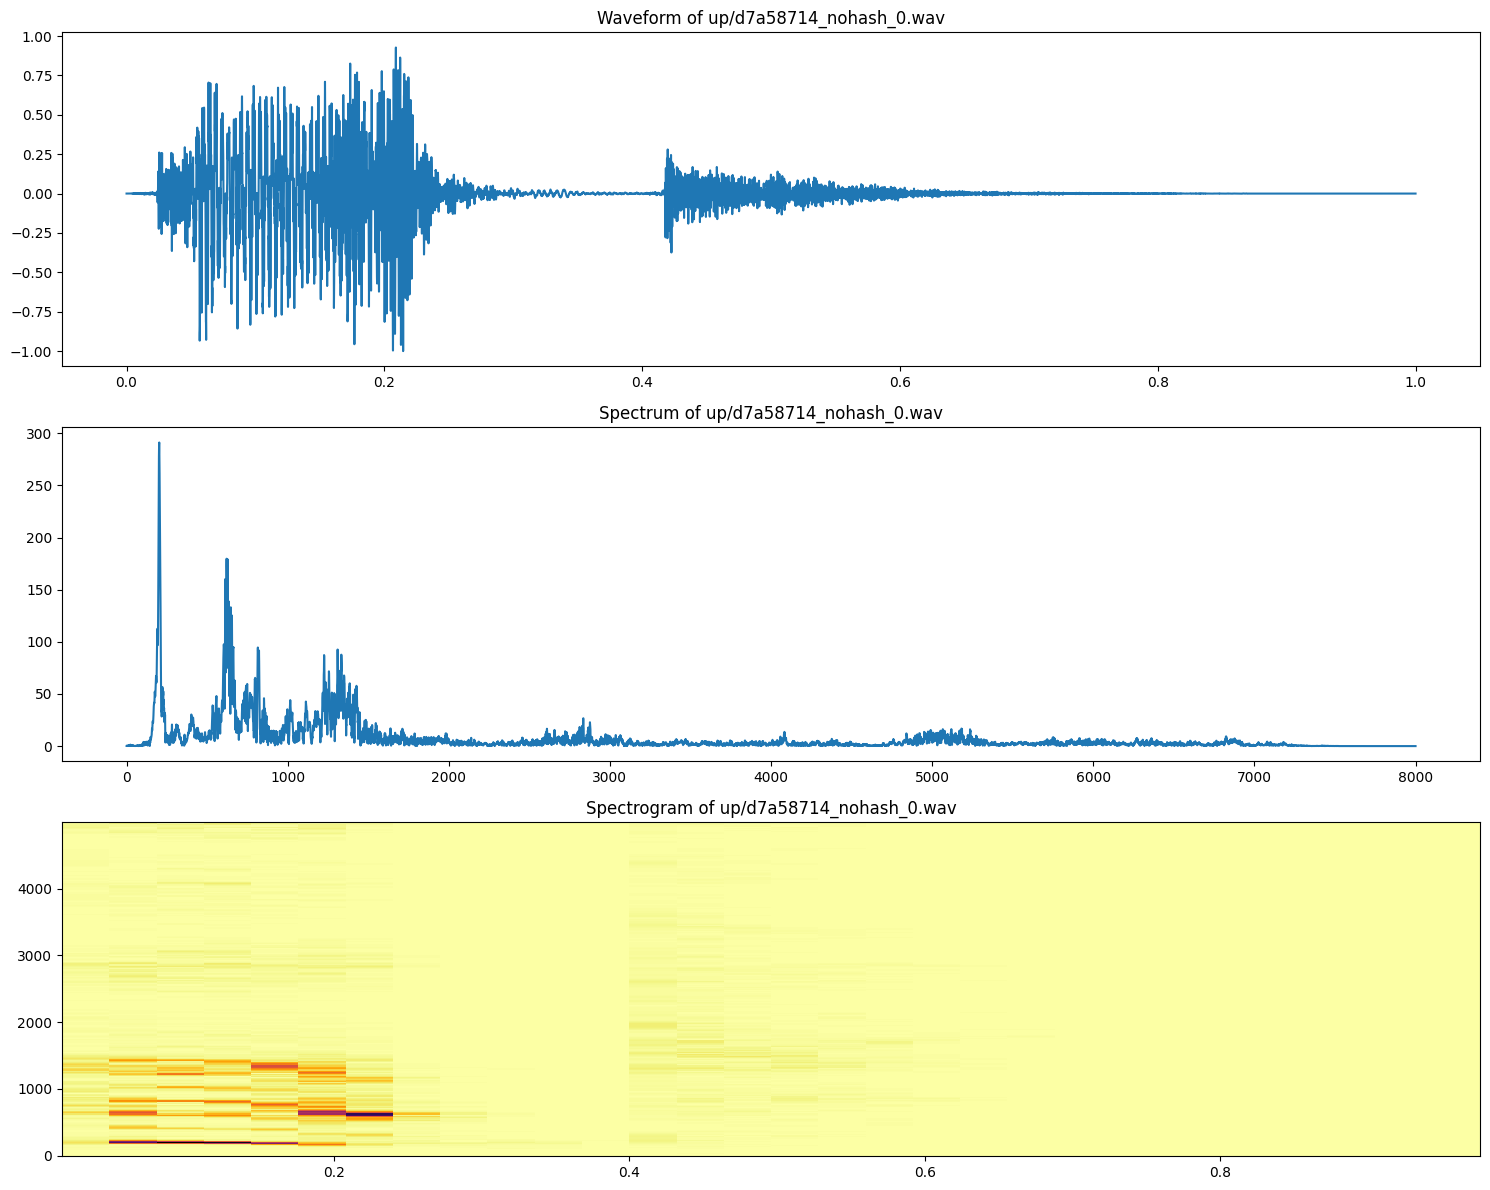

Total .wav files in down: 200


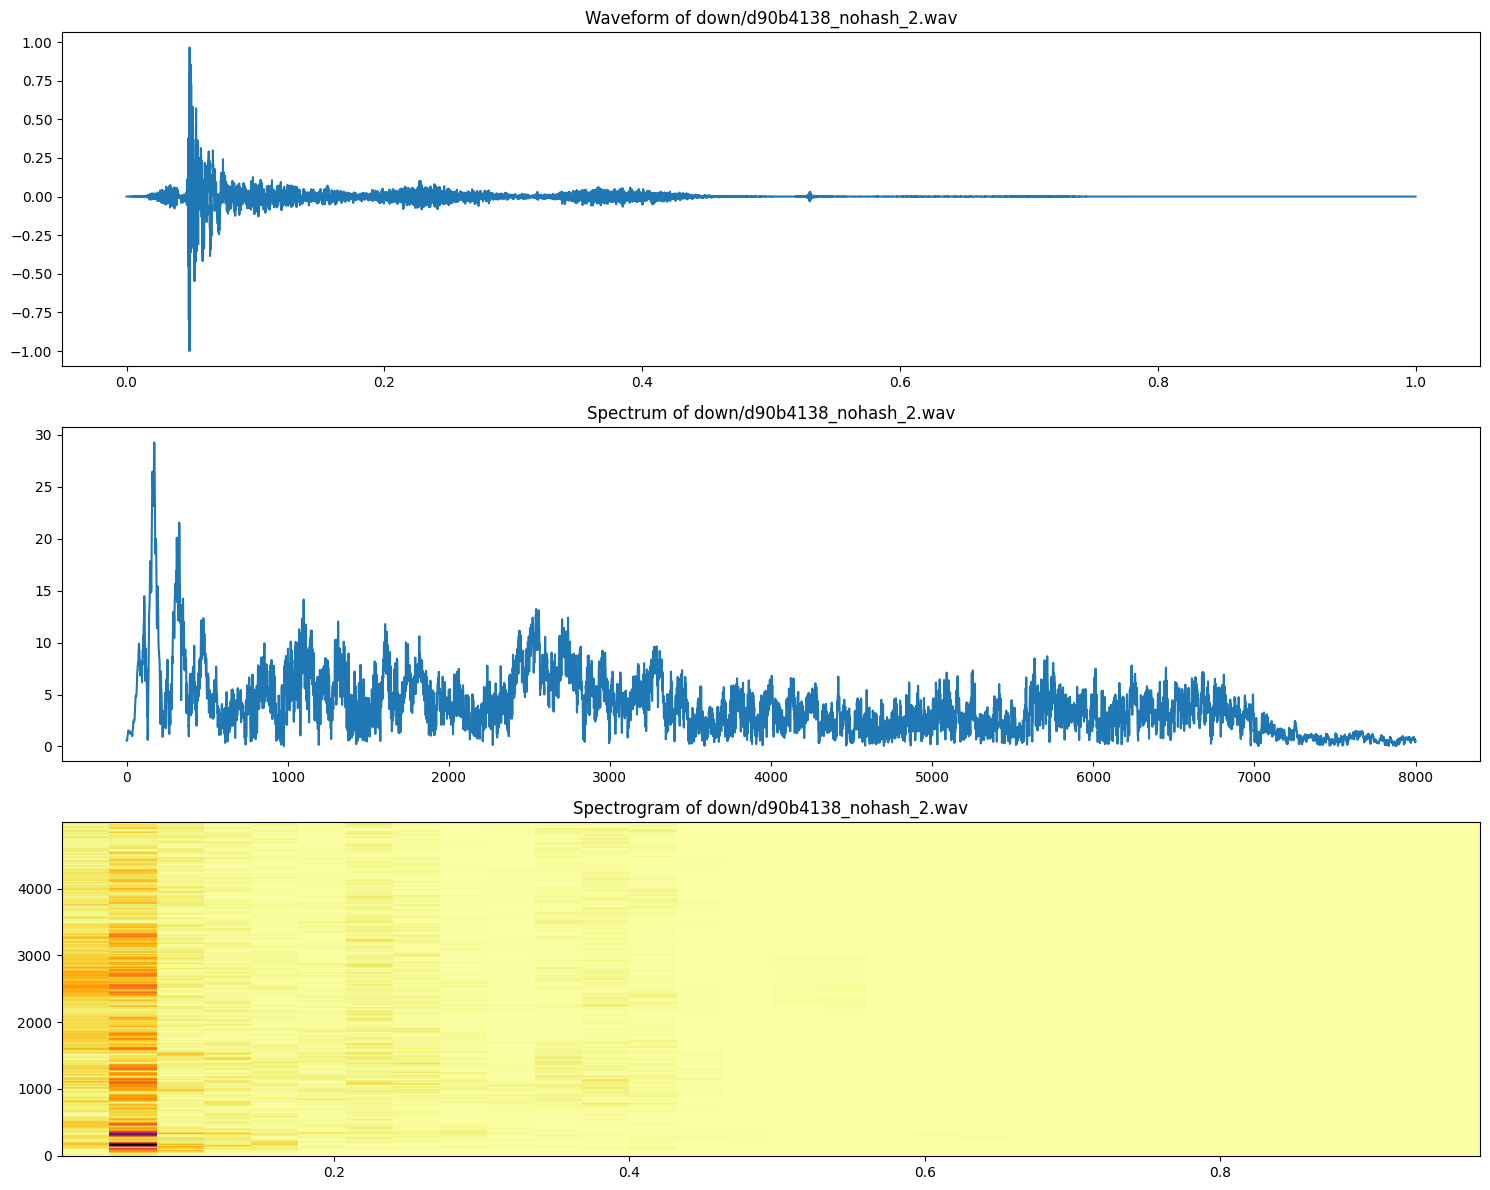

Total .wav files in left: 200


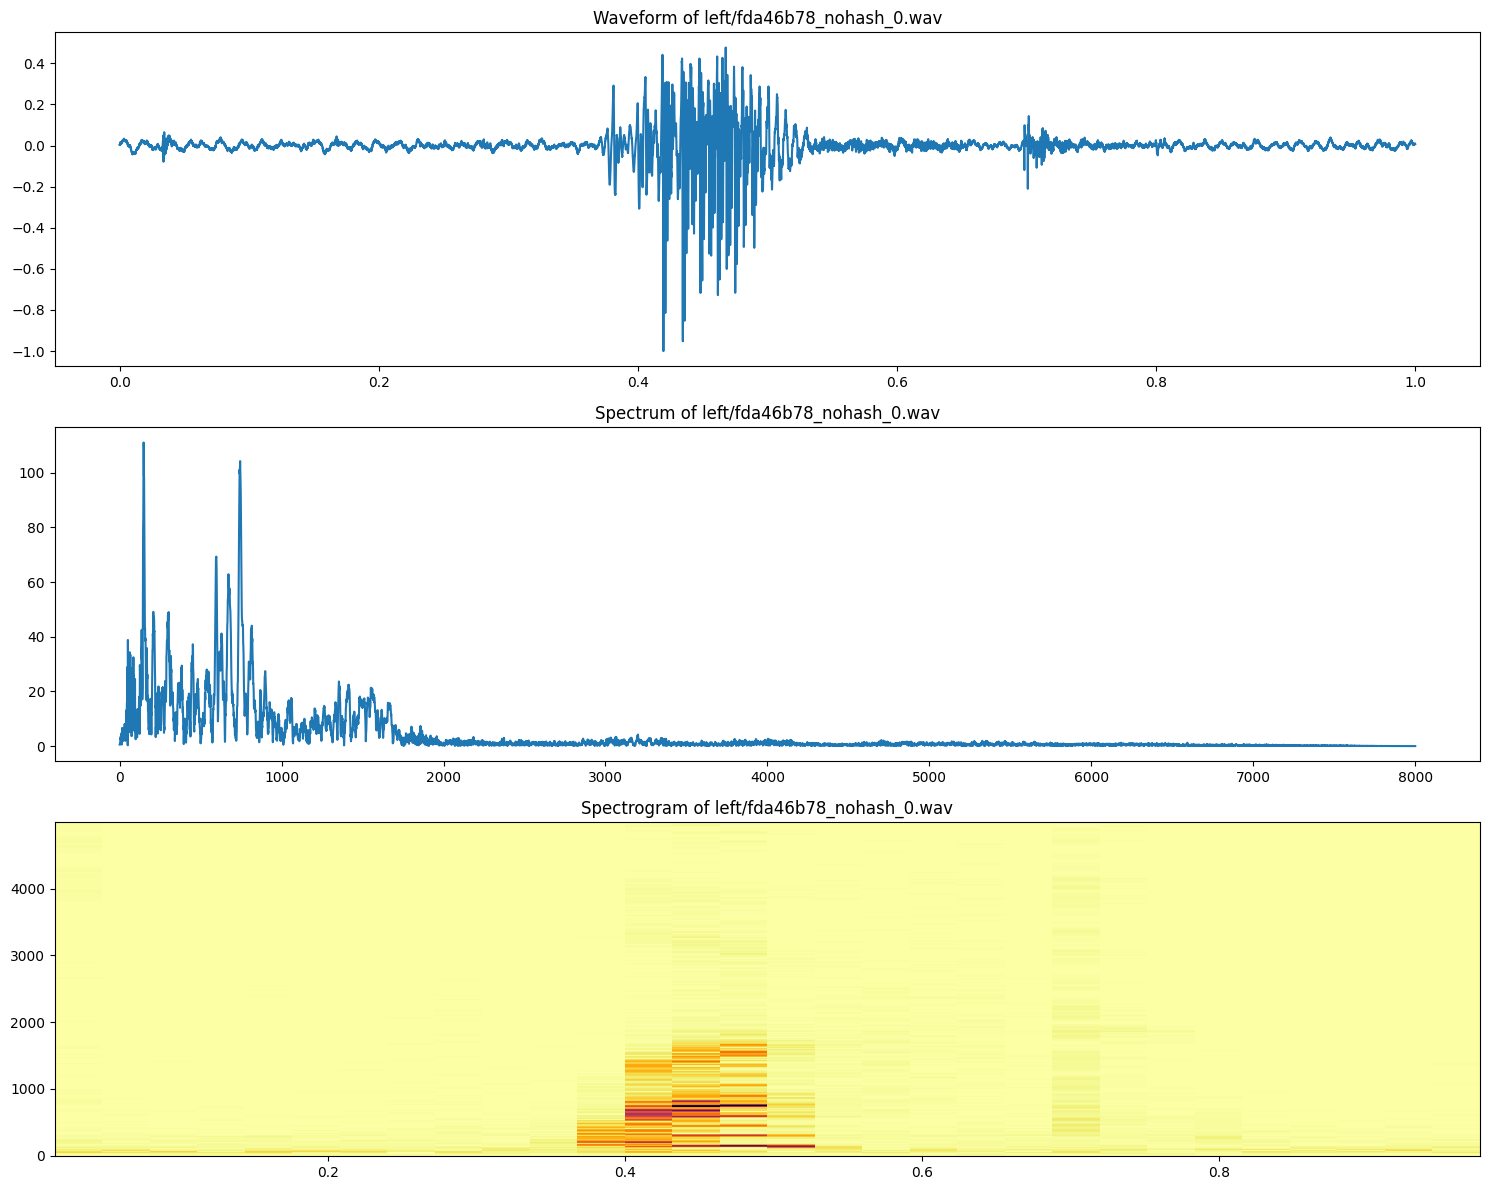

Total .wav files in right: 200


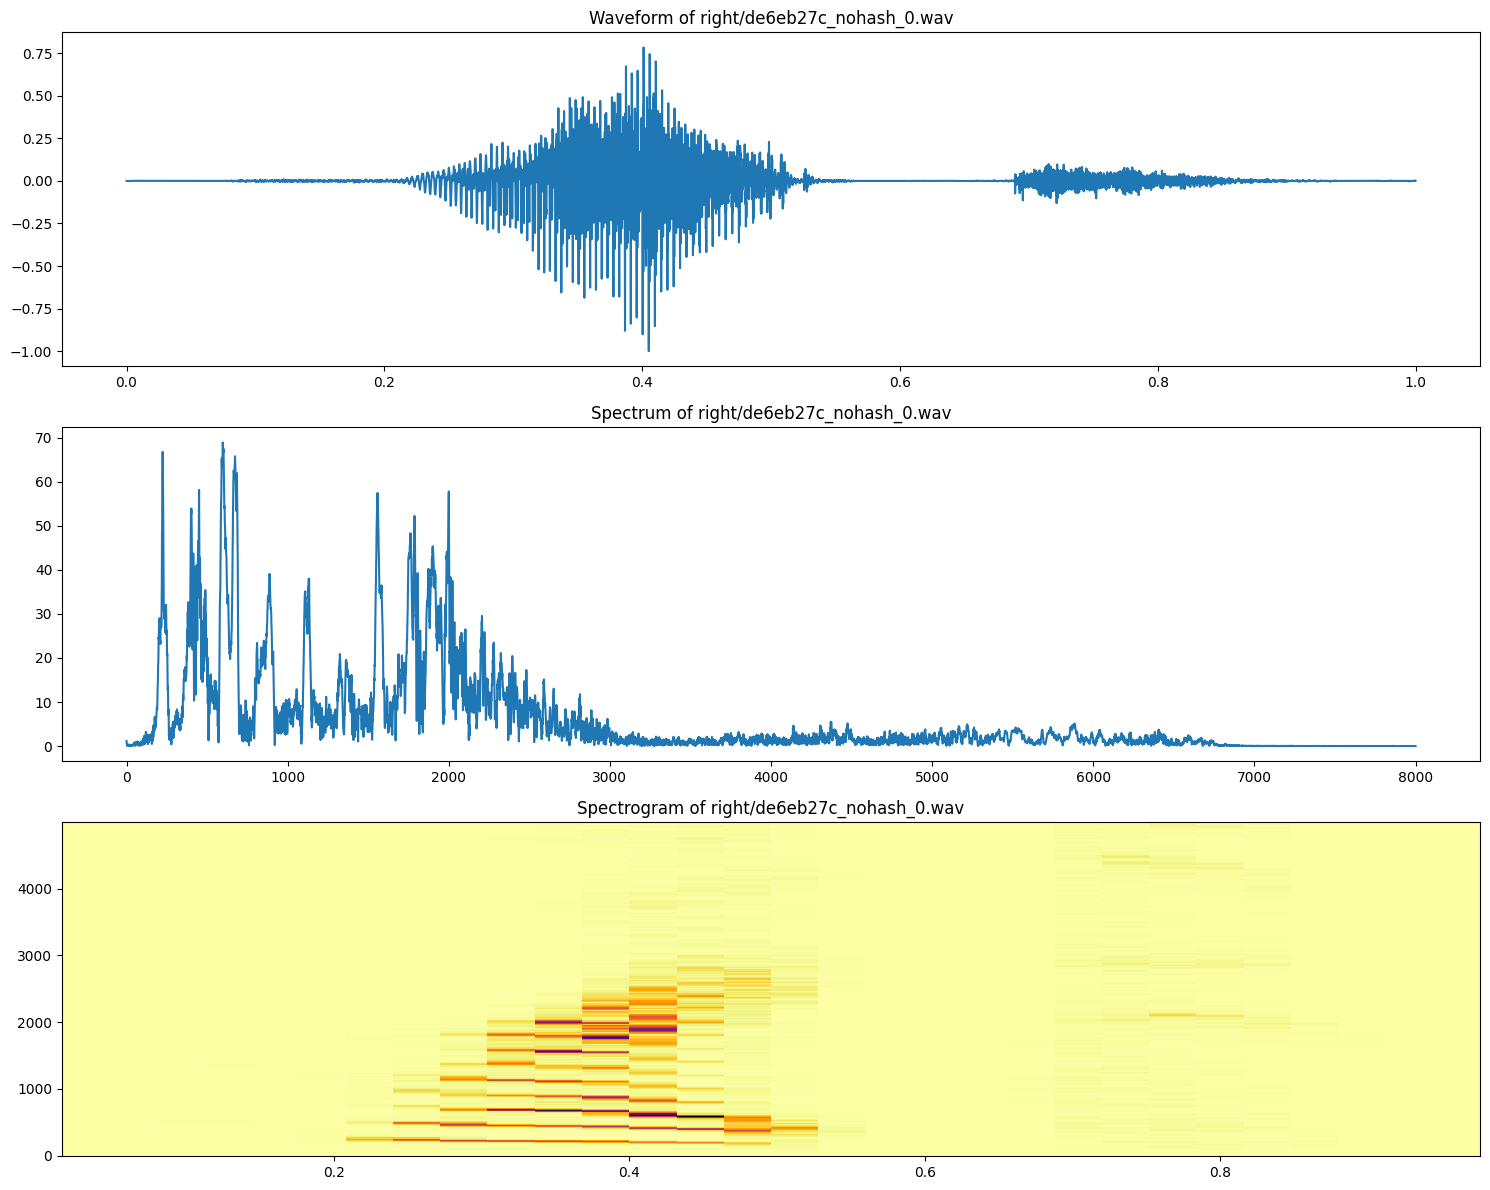

Total .wav files in yes: 200


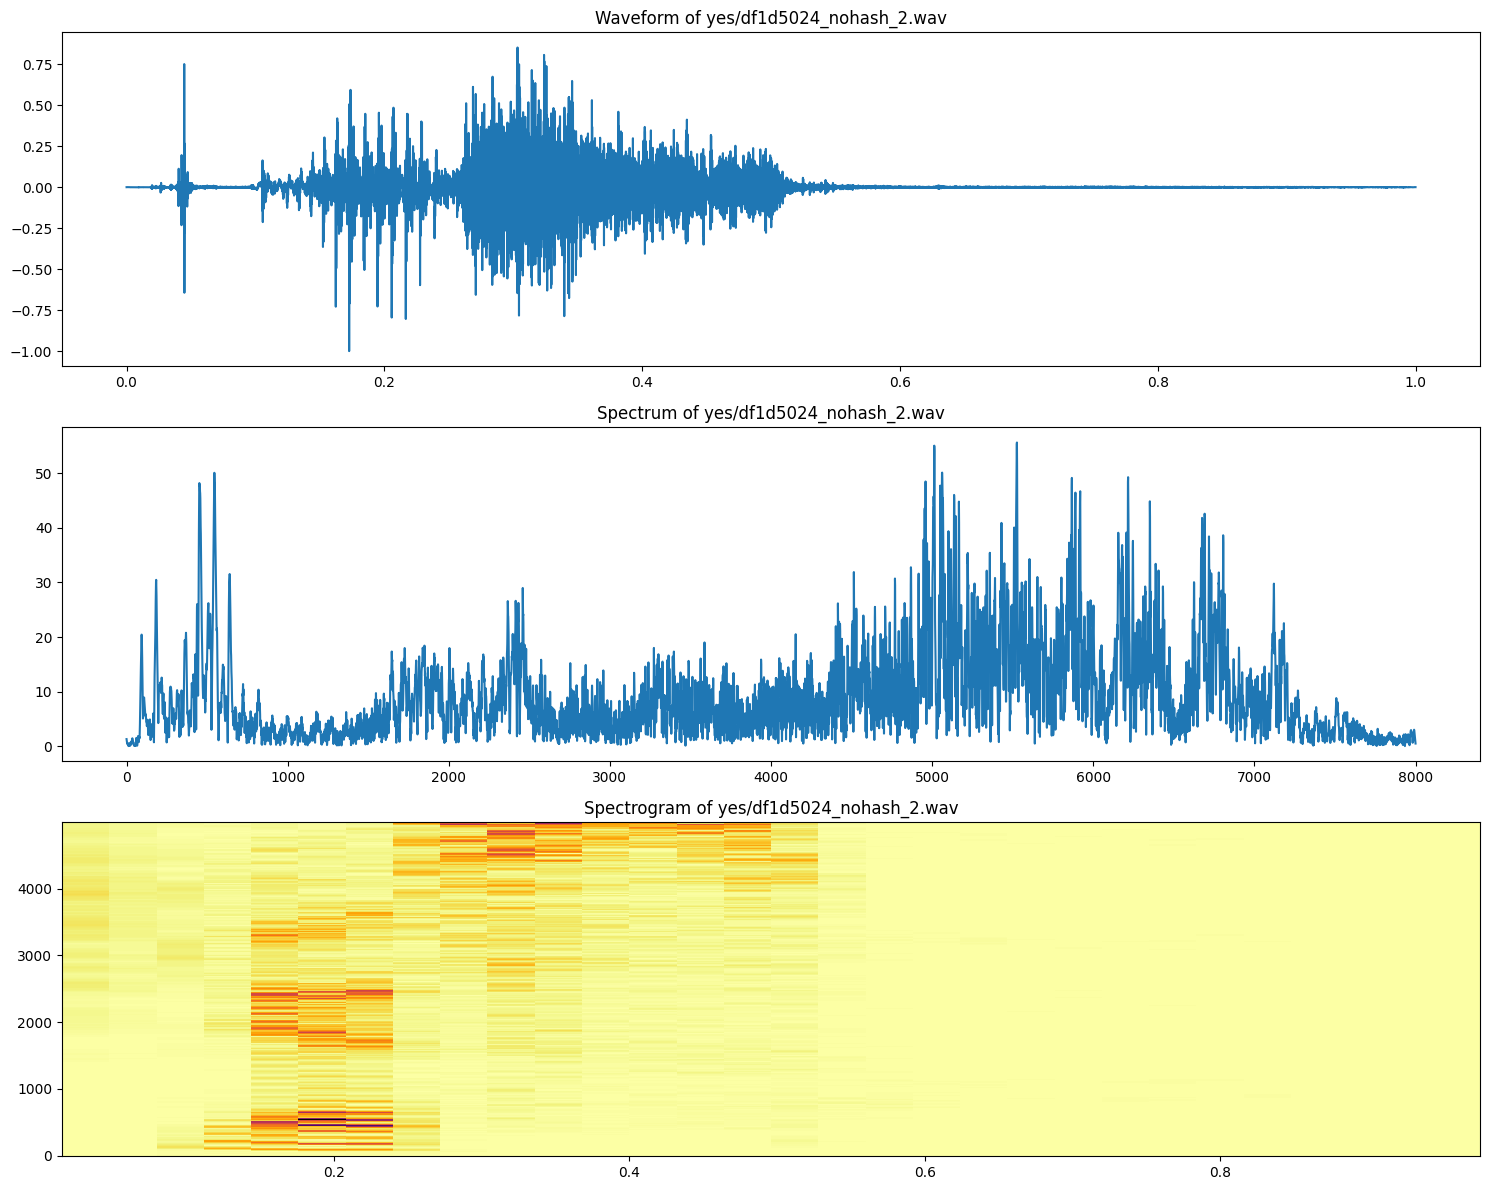

Total .wav files in no: 200


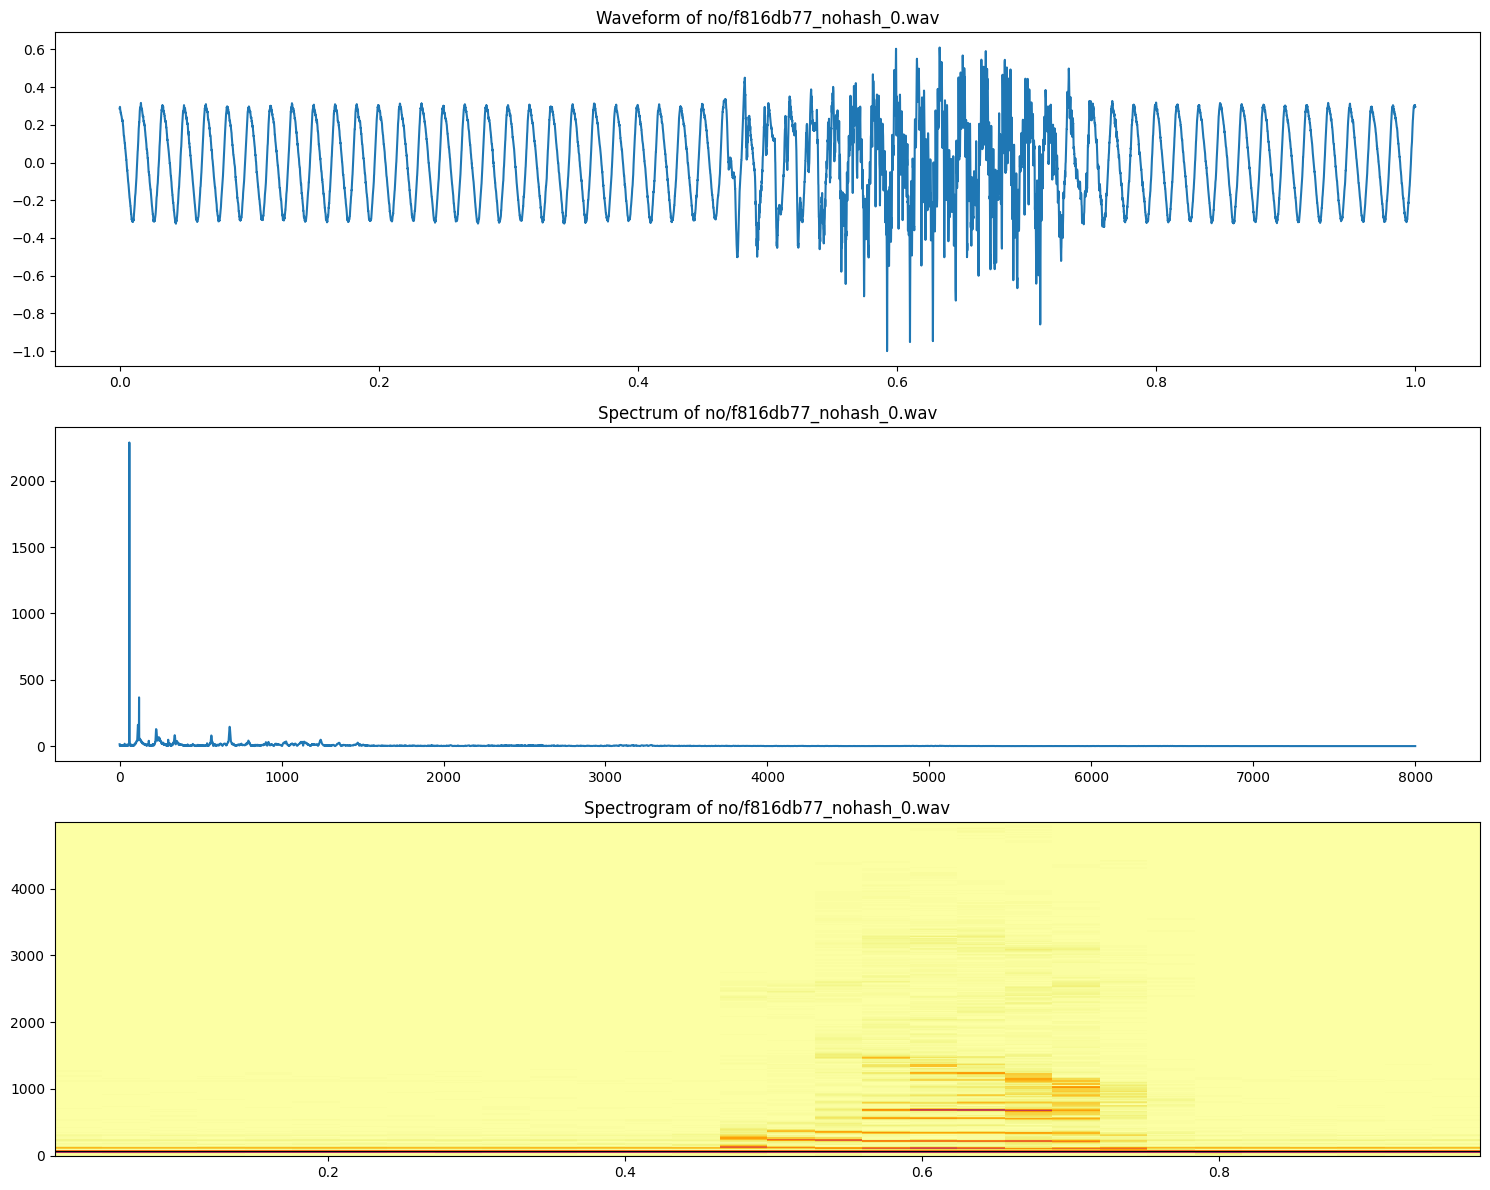

Total .wav files in stop: 200


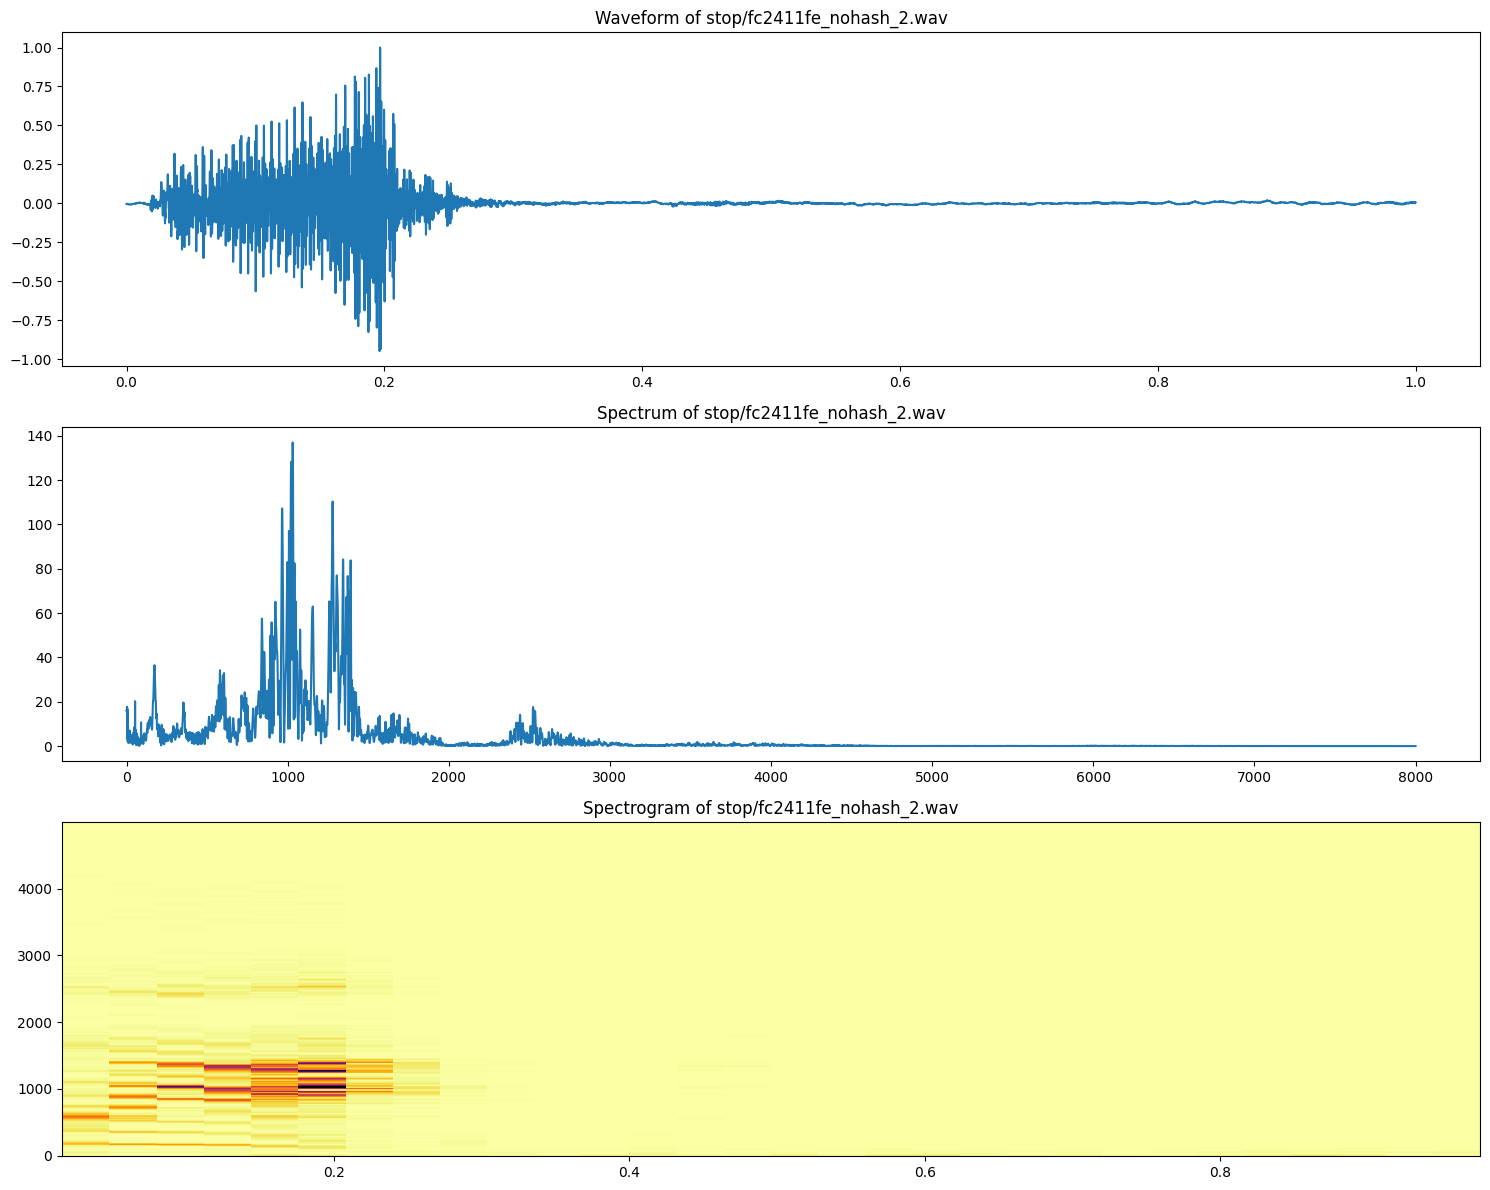

Total .wav files in go: 200


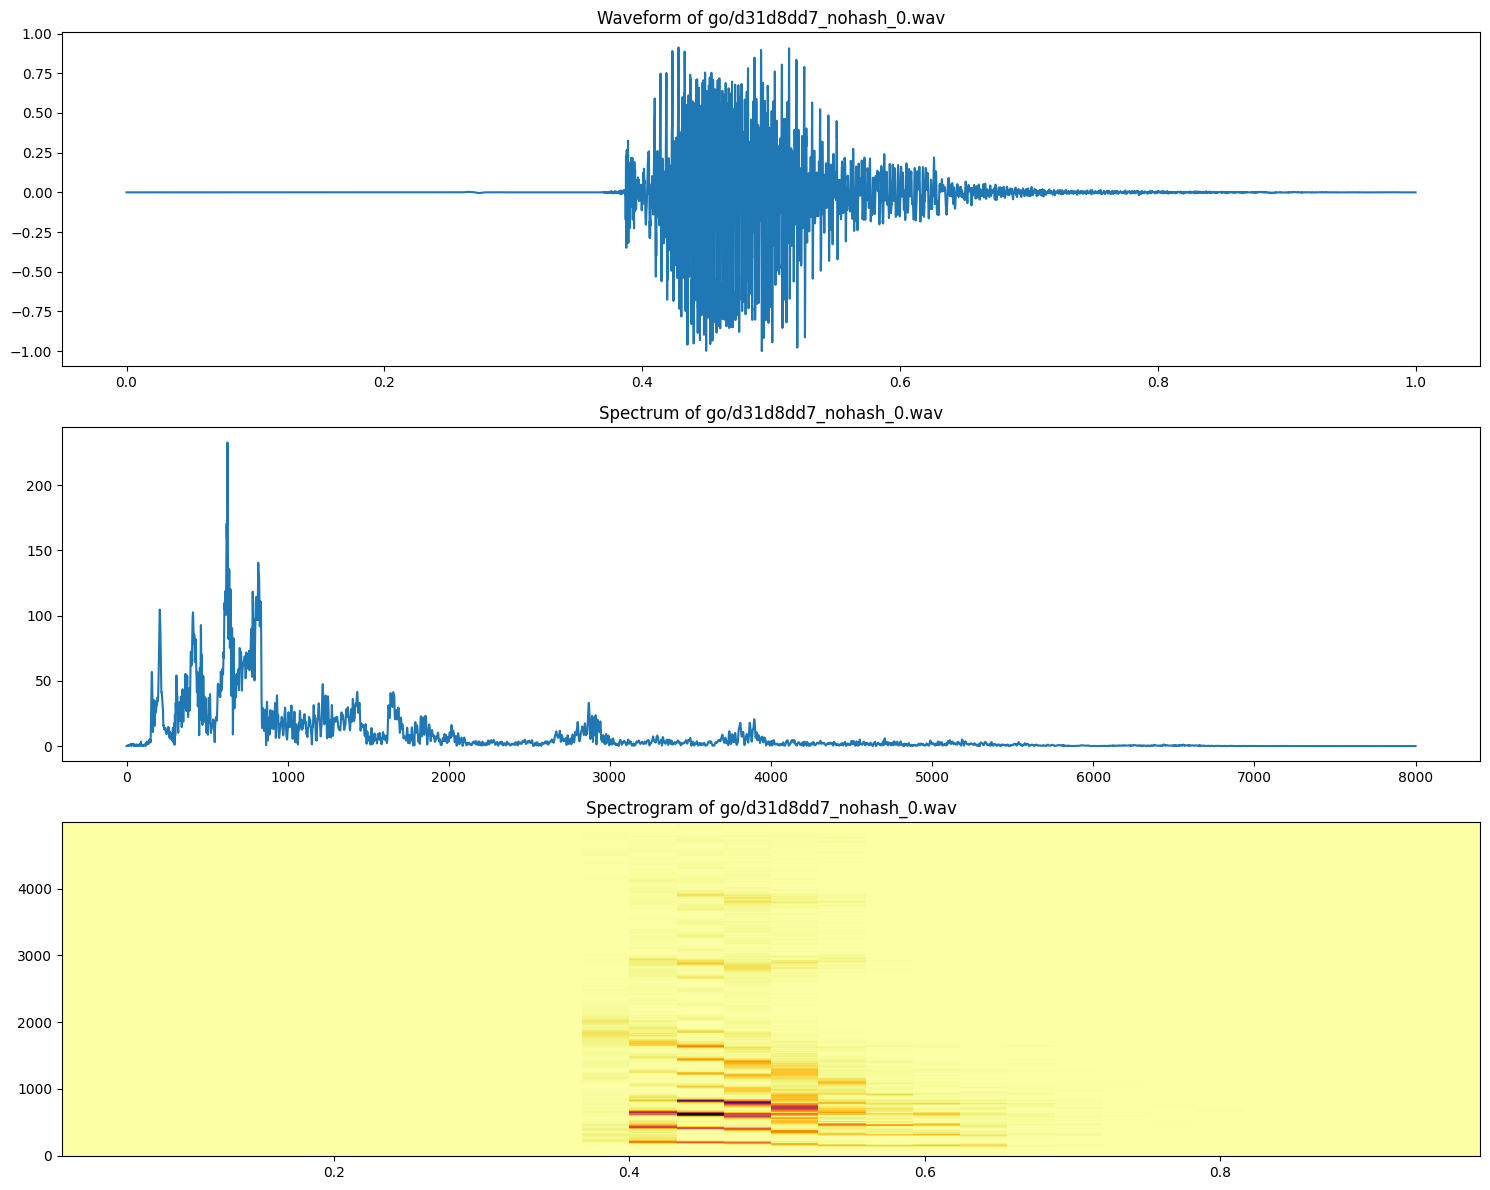

In [12]:
plot_to_analyze('/content/test_audio', 1)

# Statistical analysis 

## Dependencies

In [13]:
import os
import glob
import numpy as np
import pandas as pd
import scipy.stats as stats
from thinkdsp import read_wave

## Mean, median, standard deviatiion, skewness, kurtosis

In [15]:
def extract_wave_stats(file_path: str) -> list:
    wave = read_wave(file_path)
    ys = wave.ys
    mean = np.mean(ys)
    median = np.median(ys)
    std_dev = np.std(ys)
    skewness = stats.skew(ys)
    kurtosis = stats.kurtosis(ys)

    return [mean, median, std_dev, skewness, kurtosis]

## Statistical analysis main function

In [17]:
def stat_analysis(dir: str) -> tuple[pd.DataFrame, np.array, np.array]:
  subfolders = ["up", "down", "yes", "no", "left", "right", "stop", "go"]
  columns = ["filename", "category", "mean", "median", "std_dev", "skewness", "kurtosis"]
  
  data = []
  
  for subfolder in subfolders:
      folder_path = os.path.join(dir, subfolder)
      wav_files = glob.glob(os.path.join(folder_path, "*.wav"))
  
      for wav_file in wav_files:
          filename = os.path.basename(wav_file)
          wave_stats = extract_wave_stats(wav_file)
          data.append([filename, subfolder] + wave_stats)
  
  wave_stats_df = pd.DataFrame(data, columns=columns)
  correlation_matrix = wave_stats_df.corr()
  covariance_matrix = wave_stats_df.cov()
  return wave_stats_df, correlation_matrix, covariance_matrix

## Training statical analysis wave_stats

In [ ]:
wave_stats_df, corr, cov = stat_analysis("/content/train_audio")
wave_data = wave_stats_df["mean"]

 ## Testing stat_analysis wave_test

In [25]:
wave_stats_test, corr, cov = stat_analysis("/content/test_audio")
wave_data_test = wave_stats_test["mean"]

<ipython-input-17-1812947a61d4>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = wave_stats_df.corr()
<ipython-input-17-1812947a61d4>:18: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = wave_stats_df.cov()


# Hypothesis testiing, and plotting

## Anderson-Darling test for normal distribution

In [26]:
def anderson_darling(wave_data: pd.Series) -> None:
  """
  Anderson-Darling test for normal distribution

  Args:
    wave_data (pd.Series) : The mean column from the statistical wave stats dataframe

  Returns:
    None
  """
  anderson_result = stats.anderson(wave_data, dist="norm")
  
  print("Test Statistic: ", anderson_result.statistic)
  print("Critical Values: ", anderson_result.critical_values)
  print("Significance Levels: ", anderson_result.significance_level)
  
  alpha = 0.05  # significance level
  if anderson_result.statistic > anderson_result.critical_values[anderson_result.significance_level == alpha]:
      print("The null hypothesis can be rejected. The data does not follow a normal distribution.")
  else:
      print("The null hypothesis cannot be rejected. The data follows a normal distribution.")

In [30]:
# train
print("Anderson-Darling test for training samples: ")
print()
anderson_darling(wave_data)

print()

# test
print("Anderson-Darling test for testing samples: ")
print()
anderson_darling(wave_data_test)

Anderson-Darling test for training samples: 

Test Statistic:  2123.950993405968
Critical Values:  [0.576 0.656 0.787 0.917 1.091]
Significance Levels:  [15.  10.   5.   2.5  1. ]
The null hypothesis cannot be rejected. The data follows a normal distribution.

Anderson-Darling test for testing samples: 

Test Statistic:  529.3473190393315
Critical Values:  [0.575 0.654 0.785 0.916 1.089]
Significance Levels:  [15.  10.   5.   2.5  1. ]
The null hypothesis cannot be rejected. The data follows a normal distribution.


<ipython-input-26-b27b1a7bb805>:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if anderson_result.statistic > anderson_result.critical_values[anderson_result.significance_level == alpha]:


## Findings: Both the training and testing samples follows the normal distribution

##  Below is probability distributions to data, which can help you understand the underlying data-generating process and select the most appropriate distribution for further analysis or modeling

In [18]:
# Example: Fit a Gaussian distribution
mu, std_dev = stats.norm.fit(wave_data)

# Example: Fit a Weibull distribution
shape, loc, scale = stats.weibull_min.fit(wave_data)

# Example: Fit a Rayleigh distribution
loc, scale = stats.rayleigh.fit(wave_data)

<ipython-input-17-1812947a61d4>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = wave_stats_df.corr()
<ipython-input-17-1812947a61d4>:18: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = wave_stats_df.cov()


## Histograms for wave data statistics

Traing samples: 



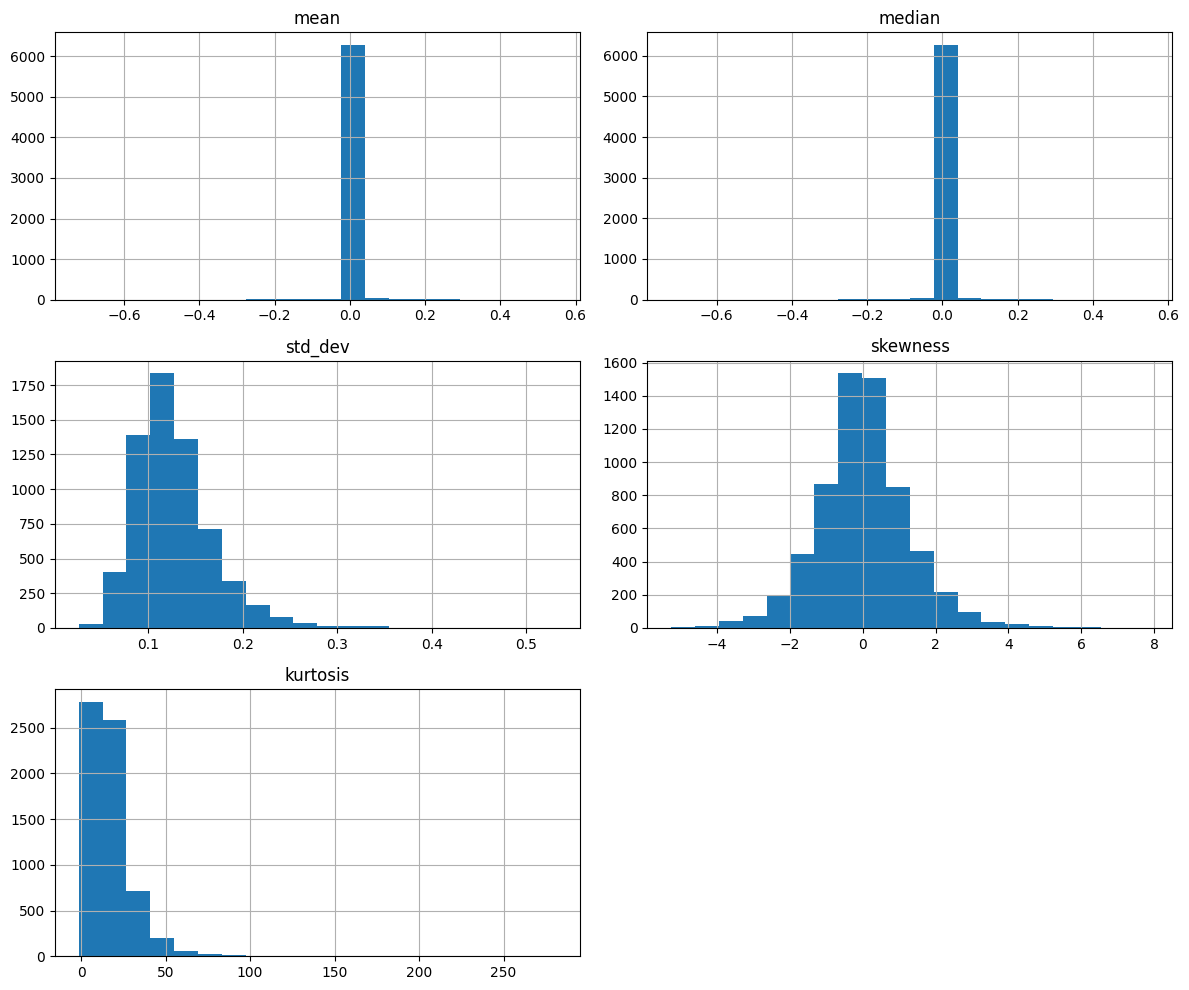


Testing samples: 



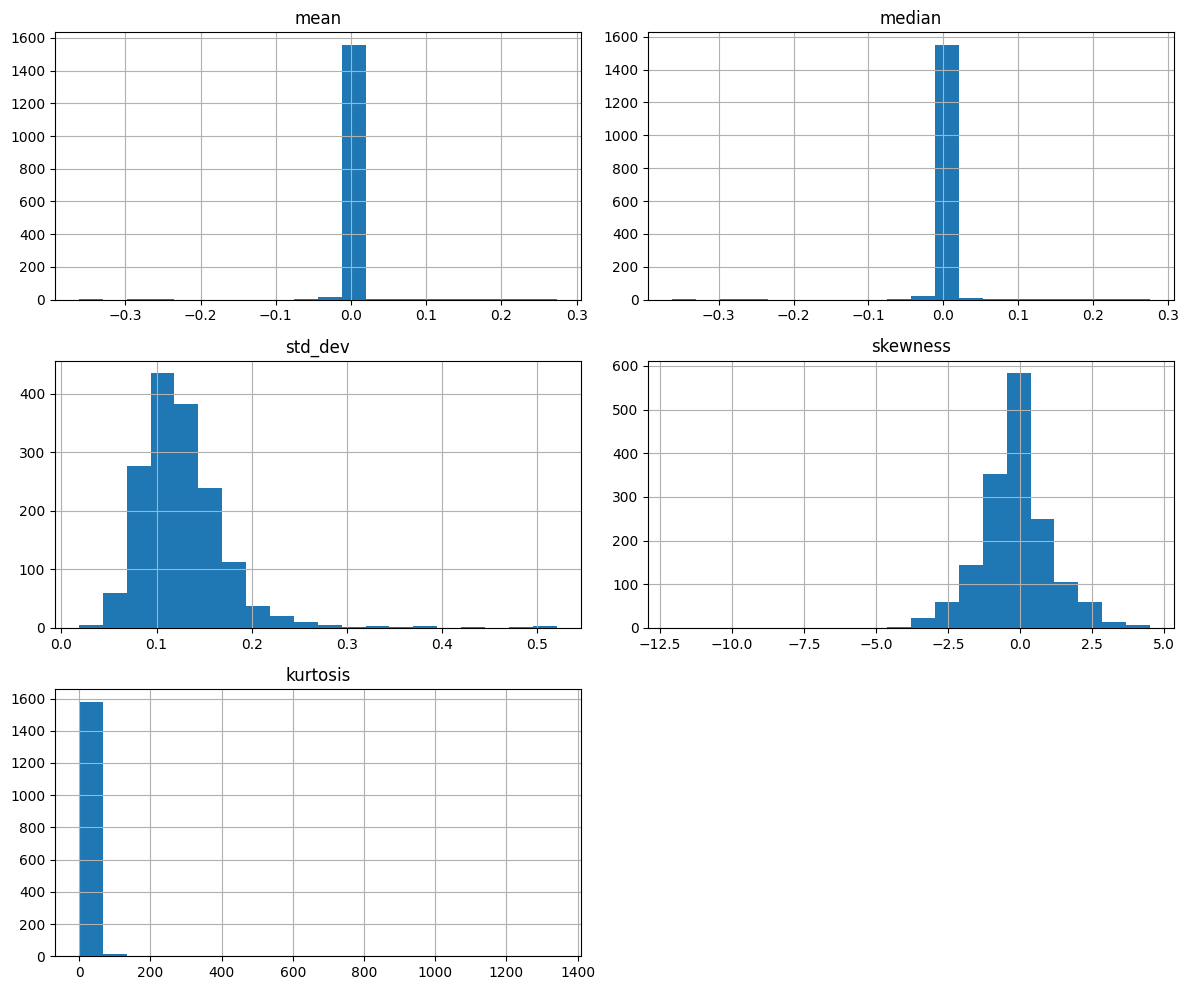

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Traing samples: \n")
wave_stats_df.hist(column=["mean", "median", "std_dev", "skewness", "kurtosis"], figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

print("\nTesting samples: \n")
wave_stats_test.hist(column=["mean", "median", "std_dev", "skewness", "kurtosis"], figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

## Findings: Mean, Median, and Standard Deviation of test, and train samples are almost the same while kurtosis and skewness are different. 
## Hence, conclusion: the overall central tendency and dispersion of the two samples are similar, but their shape and tail behavior are different

## Box plots for wave data statistics by category

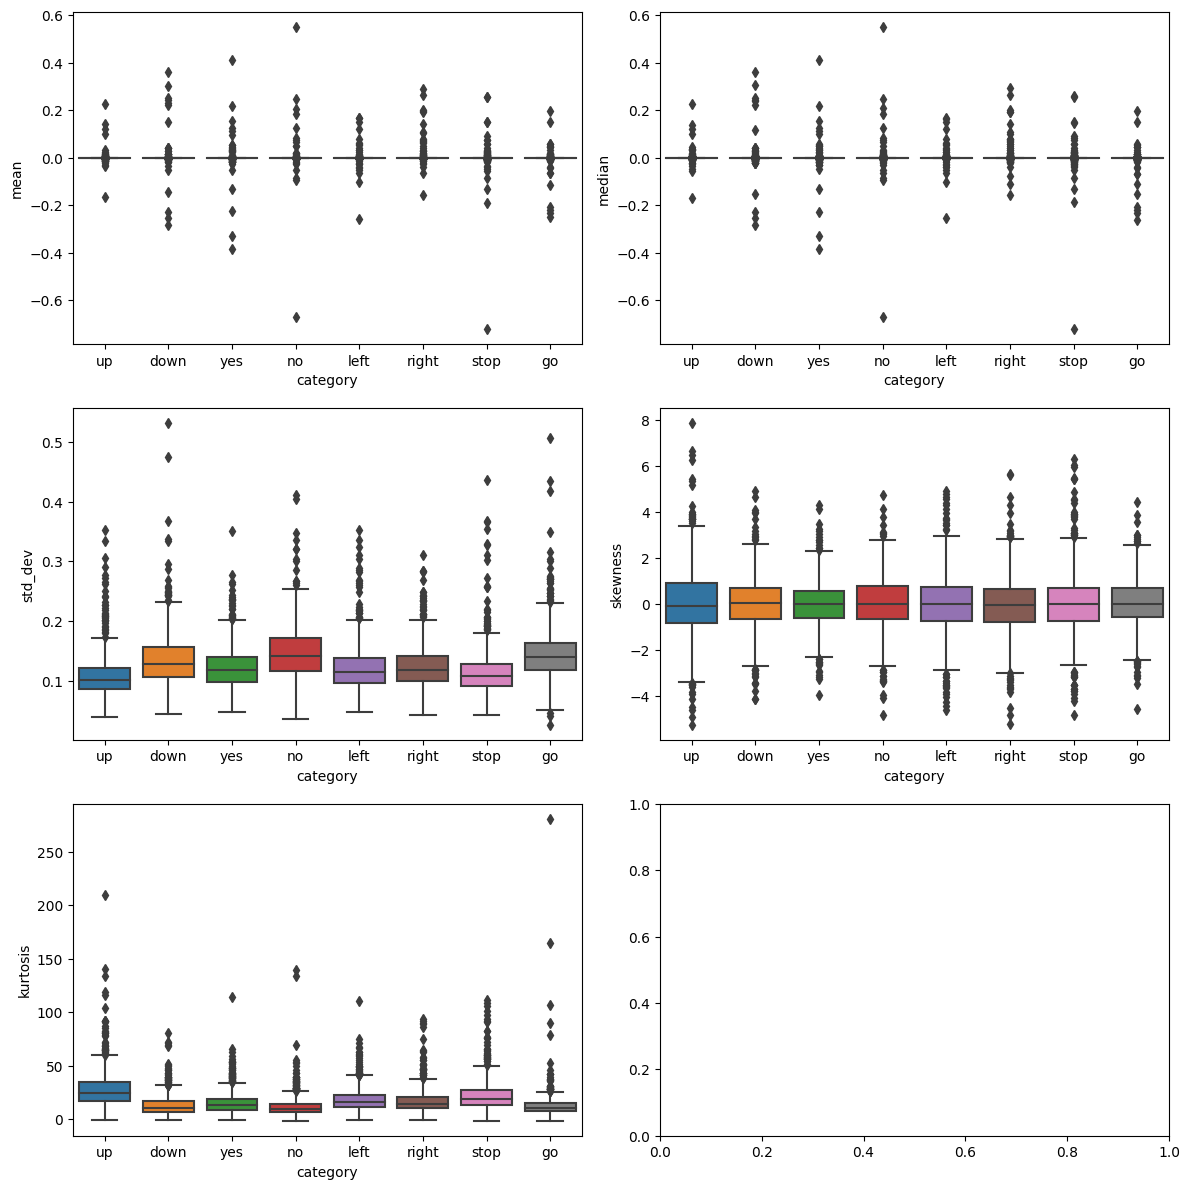

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
sns.boxplot(x="category", y="mean", data=wave_stats_df, ax=axes[0, 0])
sns.boxplot(x="category", y="median", data=wave_stats_df, ax=axes[0, 1])
sns.boxplot(x="category", y="std_dev", data=wave_stats_df, ax=axes[1, 0])
sns.boxplot(x="category", y="skewness", data=wave_stats_df, ax=axes[1, 1])
sns.boxplot(x="category", y="kurtosis", data=wave_stats_df, ax=axes[2, 0])
plt.tight_layout()
plt.show()

## Pair plot for correlations between wave data statistics

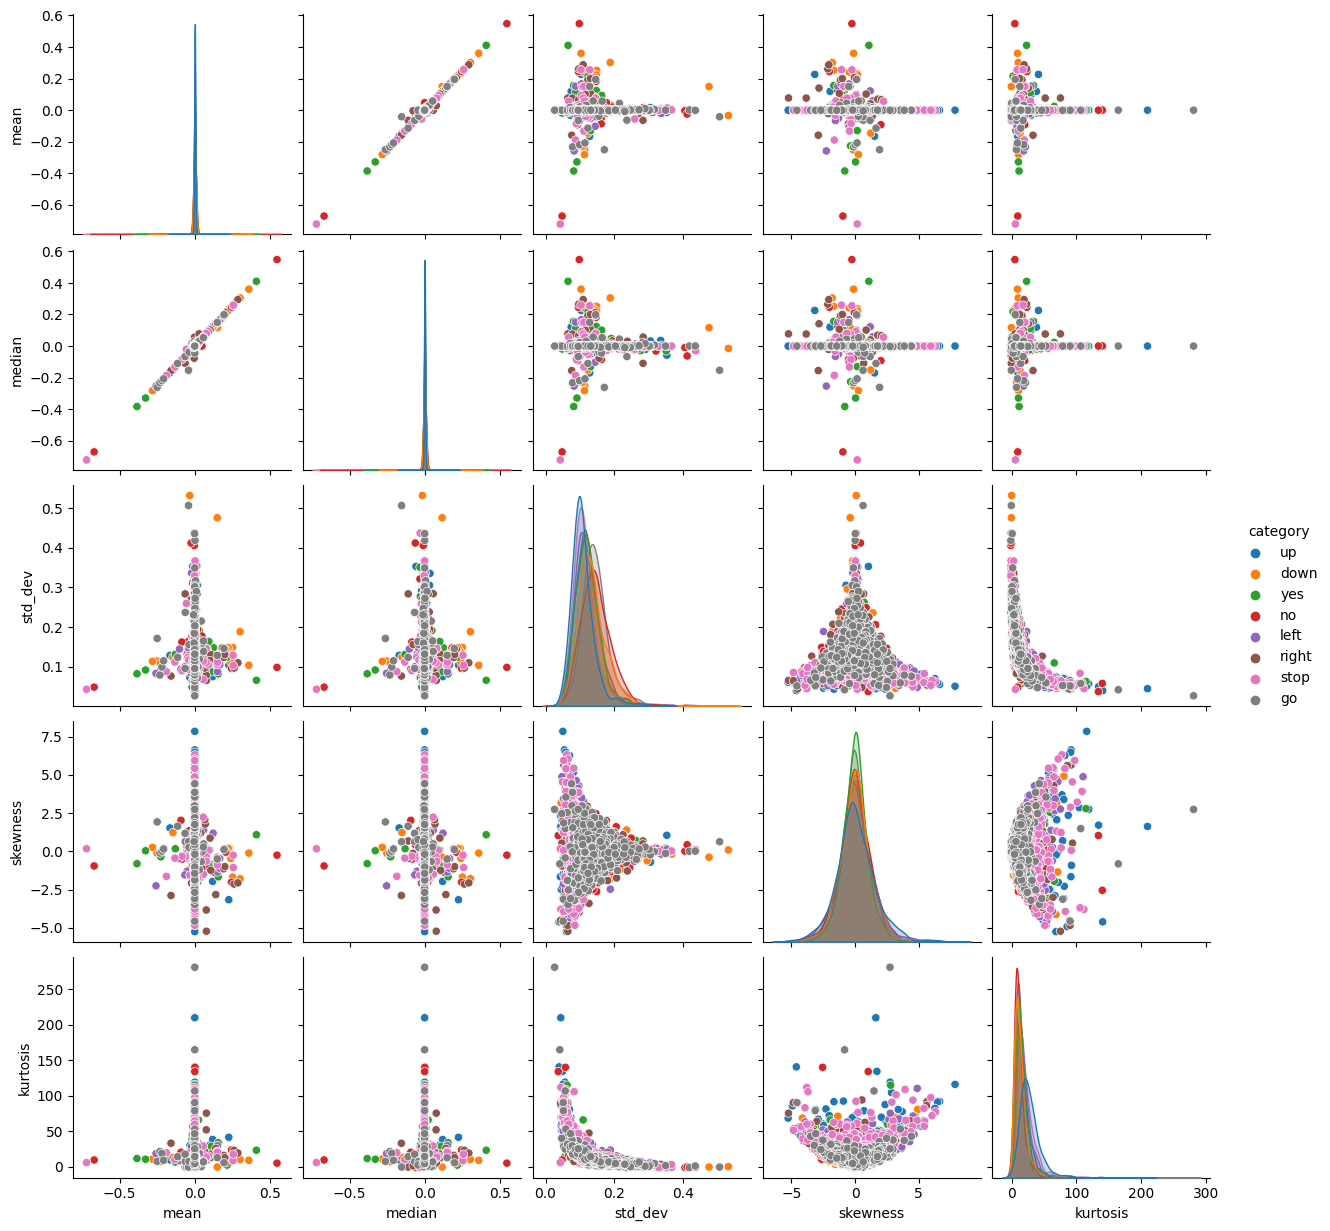

In [21]:
sns.pairplot(wave_stats_df, vars=["mean", "median", "std_dev", "skewness", "kurtosis"], hue="category")
plt.show()

## Correlation heatmap

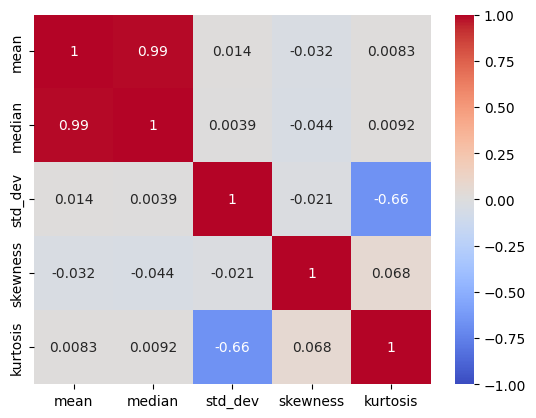

In [23]:
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

## Findings: a high correlation between the mean and median might imply that the data is relatively symmetric. In symmetric distributions, the mean, median, and mode tend to be equal or very close to each other. However, correlation only measures the linear relationship between the variables and not the shape of the distribution.

## Distribution fitting example (Gaussian)

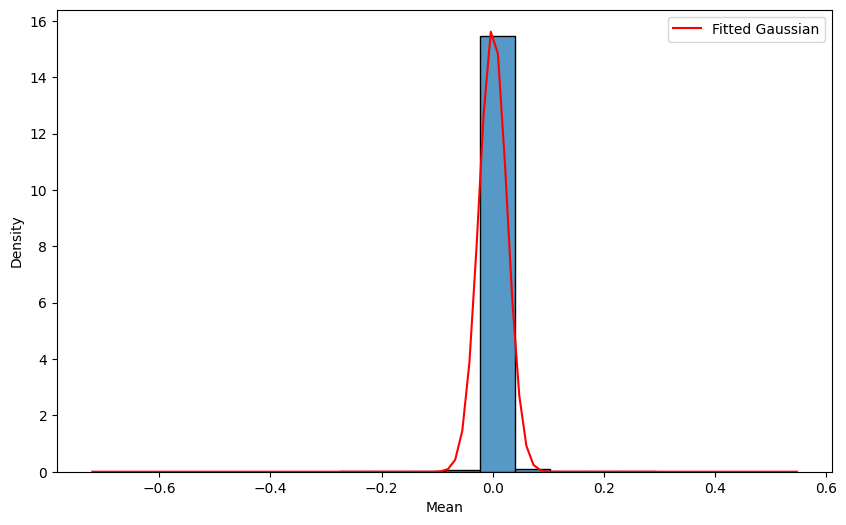

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(wave_data, kde=False, bins=20, stat="density")
x = np.linspace(wave_data.min(), wave_data.max(), 100)
pdf = stats.norm.pdf(x, mu, std_dev)
plt.plot(x, pdf, label="Fitted Gaussian", color="red")
plt.xlabel("Mean")
plt.ylabel("Density")
plt.legend()
plt.show()

## Findings: The overlapping Gaussian curve and histogram bars suggest that the data is approximately normally distributed.

## Conclusion: The data is approximately normally distributed from the above analysis

# Manipulation/ Adding noise

## Finding peaks

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import CosSignal, Wave

def find_peaks(wave: Wave) -> list[int]:
    """
    Find the indices of local maxima in a Wave object.

    Args:
        wave (Wave): The Wave object to find peaks in.

    Returns:
        List[int]: A list of indices corresponding to the peaks.
    """
    data = wave.ys
    peaks = []
    for i in range(1, len(data) - 1):
        if data[i - 1] < data[i] > data[i + 1]:
            peaks.append(i)
    return peaks

In [33]:
from typing import List, Optional
def plot_peaks(wave: Wave, peaks: Optional[List[int]] = None):
    if peaks is None:
        peaks = find_peaks(wave)
    
    plt.plot(wave.ts, wave.ys, label="Wave")
    plt.plot(wave.ts[peaks], wave.ys[peaks], "ro", label="Peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

## Manipulataing audio / adding noise
- Calculate the block_length using the manipulation_factor and the wave's length.
- Generate a random start_index for the block within the valid range.
- Replace the continuous block of samples in wave.ys with the corresponding block of samples from noise_wave.ys.

In [35]:
import thinkdsp
import random

def manipulate_audio(wave: Wave, noise_name: str, manipulation_factor: float = 0.15) -> Wave:
    """
    Add noise to a Wave object.

    Args:
        wave (Wave): The Wave object to add noise to.
        noise_name (str): The type of noise to generate.
        manipulation_factor (float, optional): The fraction of samples to manipulate.
        num_manipulations (int, optional): The number of manipulations to perform.

    Returns:
        Wave: The Wave object with added noise.
    """
  
    # Generate noise on conditions
    if noise_name == "brownian":
        noise = thinkdsp.BrownianNoise()
    elif noise_name == "uniform":
        noise = thinkdsp.UncorrelatedUniformNoise()
    elif noise_name == "pink":
        noise = thinkdsp.PinkNoise()
    elif noise_name == "gaussian":
        noise = thinkdsp.UncorrelatedGaussianNoise()
    elif noise_name == "cos":
        noise = thinkdsp.CosSignal(freq=440, amp=1.0)
    elif noise_name == "sin":
        noise = thinkdsp.SinSignal(freq=440, amp=1.0)
    elif noise_name == "quadratic":
        noise = thinkdsp.SquareSignal(freq=440, amp=1.0)
    elif noise_name == "sawtooth":
        noise = thinkdsp.SawtoothSignal(freq=440, amp=1.0)
    else:
        raise ValueError("Invalid noise_name")

    noise_wave = noise.make_wave(duration=wave.duration, start=wave.start, framerate=wave.framerate)

    num_samples = wave.ys.shape[0]
    block_length = int(num_samples * manipulation_factor)
    start_index = random.randint(0, num_samples - block_length)
    wave.ys[start_index:start_index + block_length] = noise_wave.ys[start_index:start_index + block_length]

    return wave

## Function to preprocess audio

In [36]:
import os
import librosa
import numpy as np

def process_audio_files(input_folder: str, noise_name: str, output_folder: str, manipulation_factor: float = 0.15) -> None:
    """
    Manipulate audio files in a folder by adding noise and save them to another folder.

    Args:
        input_folder (str): The path of the folder containing input audio files.
        noise_name (str): The name of the noise to be added.
        output_folder (str): The path of the folder where the manipulated audio files will be saved.
        manipulation_factor (float, optional): The fraction of samples to manipulate.
        save_spectrogram (bool, optional): If True, save the mel-spectrogram as a .npy file in the output folder.

    Returns:
        None.
    """
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                wave = read_wave(file_path)
                modified_wave = manipulate_audio(wave,noise_name, manipulation_factor)
                
                modified_wave.write(os.path.join(output_folder, file))
                
                y, sr = librosa.load(os.path.join(output_folder, file))
                spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
                
                save_path = os.path.join(output_folder, file.replace('.wav', '.npy'))
                np.save(save_path, spectrogram)

## Writing the generated noised audio to the `generated_test_audio` folder

In [37]:
import random
input_folder = '/content/test_audio'
output_folder = '/content/generated_test_audio'

# The noise list to pass and add to the original
noise_list = ["uniform", "pink", "brownian","gaussian", "cos", "sin", "quadratic", "sawtooth"]

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for subfolder in ['up', 'down', 'left', 'right', 'yes', 'no', 'stop', 'go']:
    input_subfolder = os.path.join(input_folder, subfolder)
    output_subfolder = os.path.join(output_folder, subfolder)
    
    if not os.path.exists(output_subfolder):
        os.makedirs(output_subfolder)
    
    noise_name = random.choice(noise_list)
    process_audio_files(input_subfolder, noise_name, output_subfolder)

Writing /content/generated_test_audio/up/f0ac2522_nohash_0.wav
Writing /content/generated_test_audio/up/d98f6043_nohash_0.wav
Writing /content/generated_test_audio/up/d197e3ae_nohash_0.wav
Writing /content/generated_test_audio/up/d7529c0c_nohash_0.wav
Writing /content/generated_test_audio/up/fda46b78_nohash_1.wav
Writing /content/generated_test_audio/up/e4a2cf79_nohash_1.wav
Writing /content/generated_test_audio/up/e2362167_nohash_0.wav
Writing /content/generated_test_audio/up/f174517e_nohash_0.wav
Writing /content/generated_test_audio/up/d7467392_nohash_0.wav
Writing /content/generated_test_audio/up/e62056e2_nohash_0.wav
Writing /content/generated_test_audio/up/e95c70e2_nohash_0.wav
Writing /content/generated_test_audio/up/d85270c1_nohash_1.wav
Writing /content/generated_test_audio/up/e1469561_nohash_4.wav
Writing /content/generated_test_audio/up/f34e6f44_nohash_0.wav
Writing /content/generated_test_audio/up/e1469561_nohash_0.wav
Writing /content/generated_test_audio/up/f59d0771_nohas

/content/thinkdsp.py:1173: UserWarning: Warning: normalizing before quantizing.
  warnings.warn("Warning: normalizing before quantizing.")


Writing /content/generated_test_audio/up/e96a5020_nohash_1.wav
Writing /content/generated_test_audio/up/d312f481_nohash_0.wav
Writing /content/generated_test_audio/up/fd395b74_nohash_2.wav
Writing /content/generated_test_audio/up/f33660af_nohash_1.wav
Writing /content/generated_test_audio/up/ecd4fd45_nohash_0.wav
Writing /content/generated_test_audio/up/e63b69c5_nohash_0.wav
Writing /content/generated_test_audio/up/e5dadd24_nohash_2.wav
Writing /content/generated_test_audio/up/f8f60f59_nohash_0.wav
Writing /content/generated_test_audio/up/ef2a3cfb_nohash_1.wav
Writing /content/generated_test_audio/up/eb0676ec_nohash_3.wav
Writing /content/generated_test_audio/up/e0611c84_nohash_0.wav
Writing /content/generated_test_audio/up/f2dd248e_nohash_1.wav
Writing /content/generated_test_audio/up/d069e6ff_nohash_0.wav
Writing /content/generated_test_audio/up/ee483d85_nohash_3.wav
Writing /content/generated_test_audio/up/d197e3ae_nohash_3.wav
Writing /content/generated_test_audio/up/d1d3e64d_nohas

# Checking if we have equal number of generated files

In [38]:
generated_path = "/content/generated_test_audio"
for subfolder in ['up', 'down', 'left', 'right', 'yes', 'no', 'stop', 'go']:
    input_subfolder = os.path.join(generated_path, subfolder)
    
    # Count .wav files in the subfolder
    total_files = count_wav_files(input_subfolder)
    print(f'Total .wav files in {subfolder}: {total_files}')

Total .wav files in up: 199
Total .wav files in down: 200
Total .wav files in left: 200
Total .wav files in right: 200
Total .wav files in yes: 200
Total .wav files in no: 200
Total .wav files in stop: 200
Total .wav files in go: 200


# Comparing by picking a random file

In [39]:
import os
import random
from thinkdsp import read_wave

def compare_files(test_dir: str, generated_dir: str) -> tuple[Wave, Wave, str, str]:
  """
  Compare a random .wav file in a subfolder of two directories.

    Args:
        test_dir (str): The path of the directory containing the original audio files.
        generated_dir (str): The path of the directory containing the manipulated audio files.

    Returns:
        tuple[Wave, Wave, str, str]: A tuple containing the two Wave objects representing the original and manipulated audio files, and their respective file paths. Returns None if no .wav files are found in one of the chosen subfolders.
  """
  
  # Define the subfolders
  subfolders = ["up", "down", "right", "left", "go", "stop", "yes", "no"]
  
  # Choose a random subfolder
  random_subfolder = random.choice(subfolders)
  
  # List all .wav files in the chosen subfolder of both directories
  files_test_dir = [f for f in os.listdir(os.path.join(test_dir, random_subfolder)) if f.endswith(".wav")]
  files_generated_dir = [f for f in os.listdir(os.path.join(generated_dir, random_subfolder)) if f.endswith(".wav")]
  
  # Check if there are .wav files in both directories' chosen subfolders
  if not files_test_dir or not files_generated_dir:
      print("No .wav files found in one of the chosen subfolders.")
  else:
      # Choose a random .wav file
      random_file = random.choice(files_test_dir)
  
      # Create file paths
      file_path1 = os.path.join(test_dir, random_subfolder, random_file)
      file_path2 = os.path.join(generated_dir, random_subfolder, random_file)
      
      print(f"test file path: {file_path1}")
      print(f"generated file path : {file_path2}")
      print()
  
      # Read and compare the two .wav files using thinkdsp
      wave1 = read_wave(file_path1)
      wave2 = read_wave(file_path2)
  
      # Compare the two .wav files' shape
      if wave1.ys.shape == wave2.ys.shape:
          print("The .wav files are identical.")
      else:
          print("The .wav files are not identical.")
  
      # Check if they are exact duplicate of noise has been added
      if(wave1.ys == wave2.ys).all():
          print("The file is exact duplicate")
  
      else:
          print("The noise has been added successfully")

      return wave1, wave2, file_path1, file_path2

In [67]:
test_wave, noised_wave, test_wave_des, noised_wave_des = compare_files("test_audio",  "generated_test_audio")

test file path: test_audio/stop/ffa76c4a_nohash_1.wav
generated file path : generated_test_audio/stop/ffa76c4a_nohash_1.wav

The .wav files are identical.
The noise has been added successfully


In [68]:
print(test_wave_des)
print(noised_wave_des)

test_audio/stop/ffa76c4a_nohash_1.wav
generated_test_audio/stop/ffa76c4a_nohash_1.wav


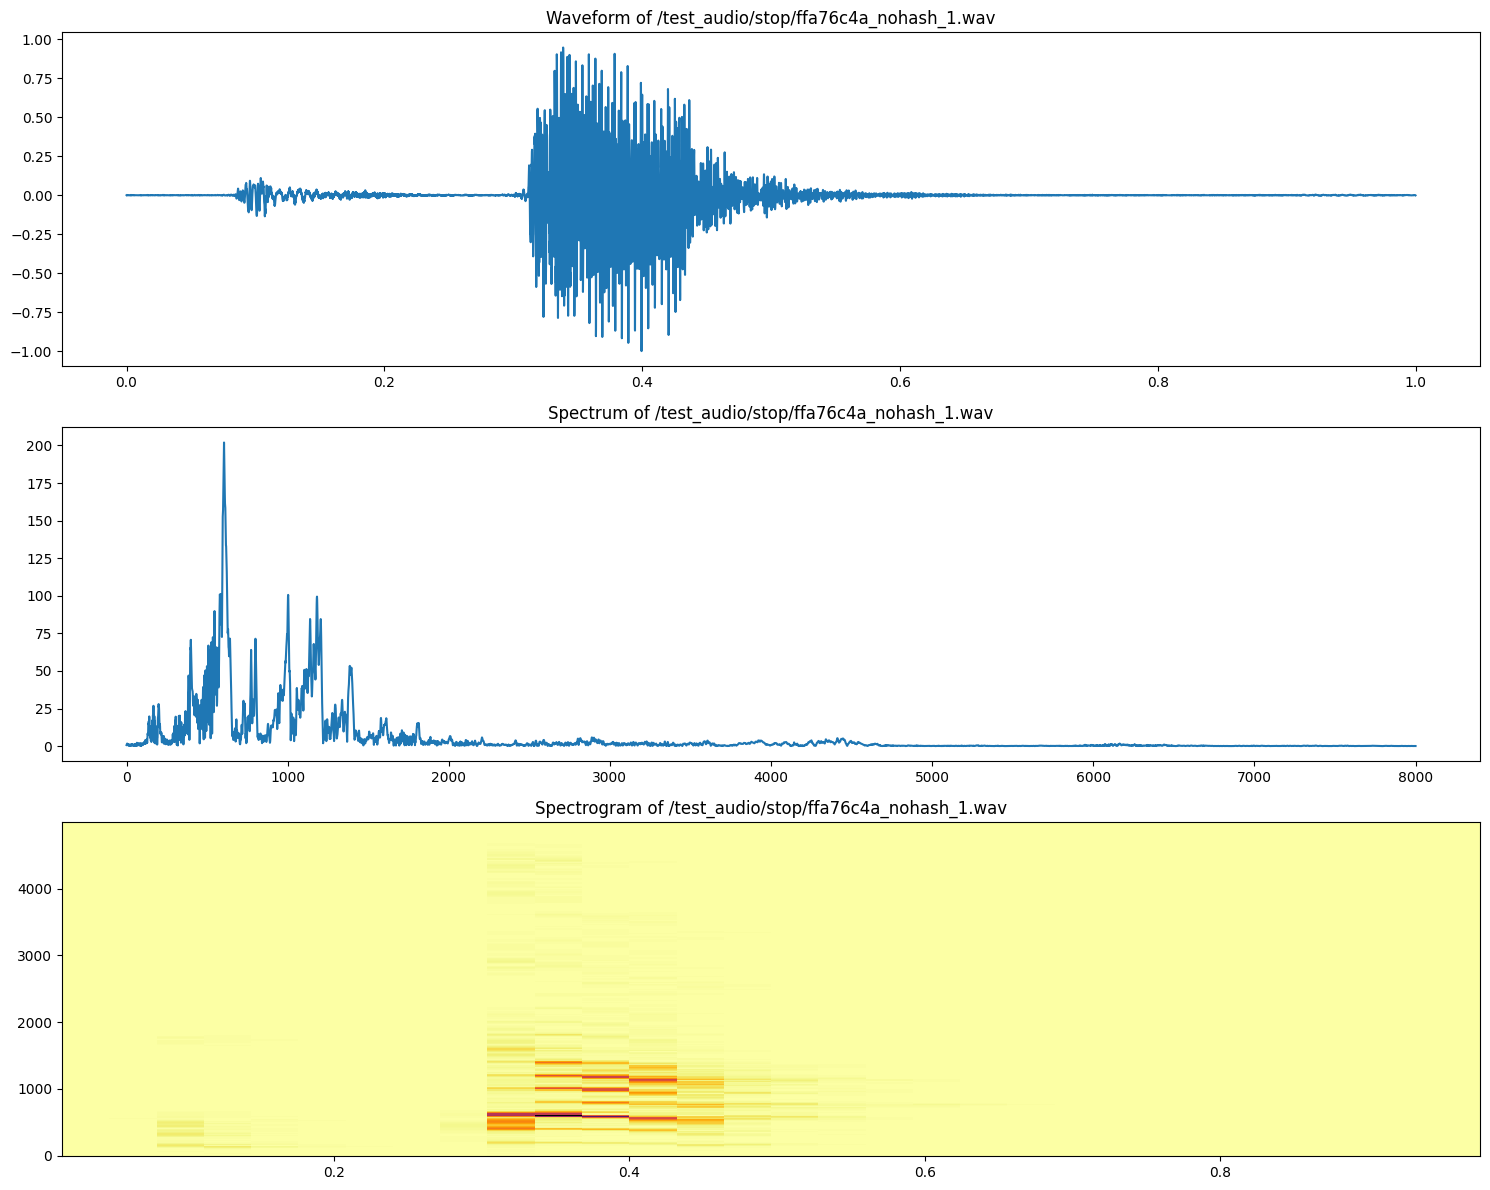

In [69]:
plot_audio_analysis(test_wave, '',test_wave_des)

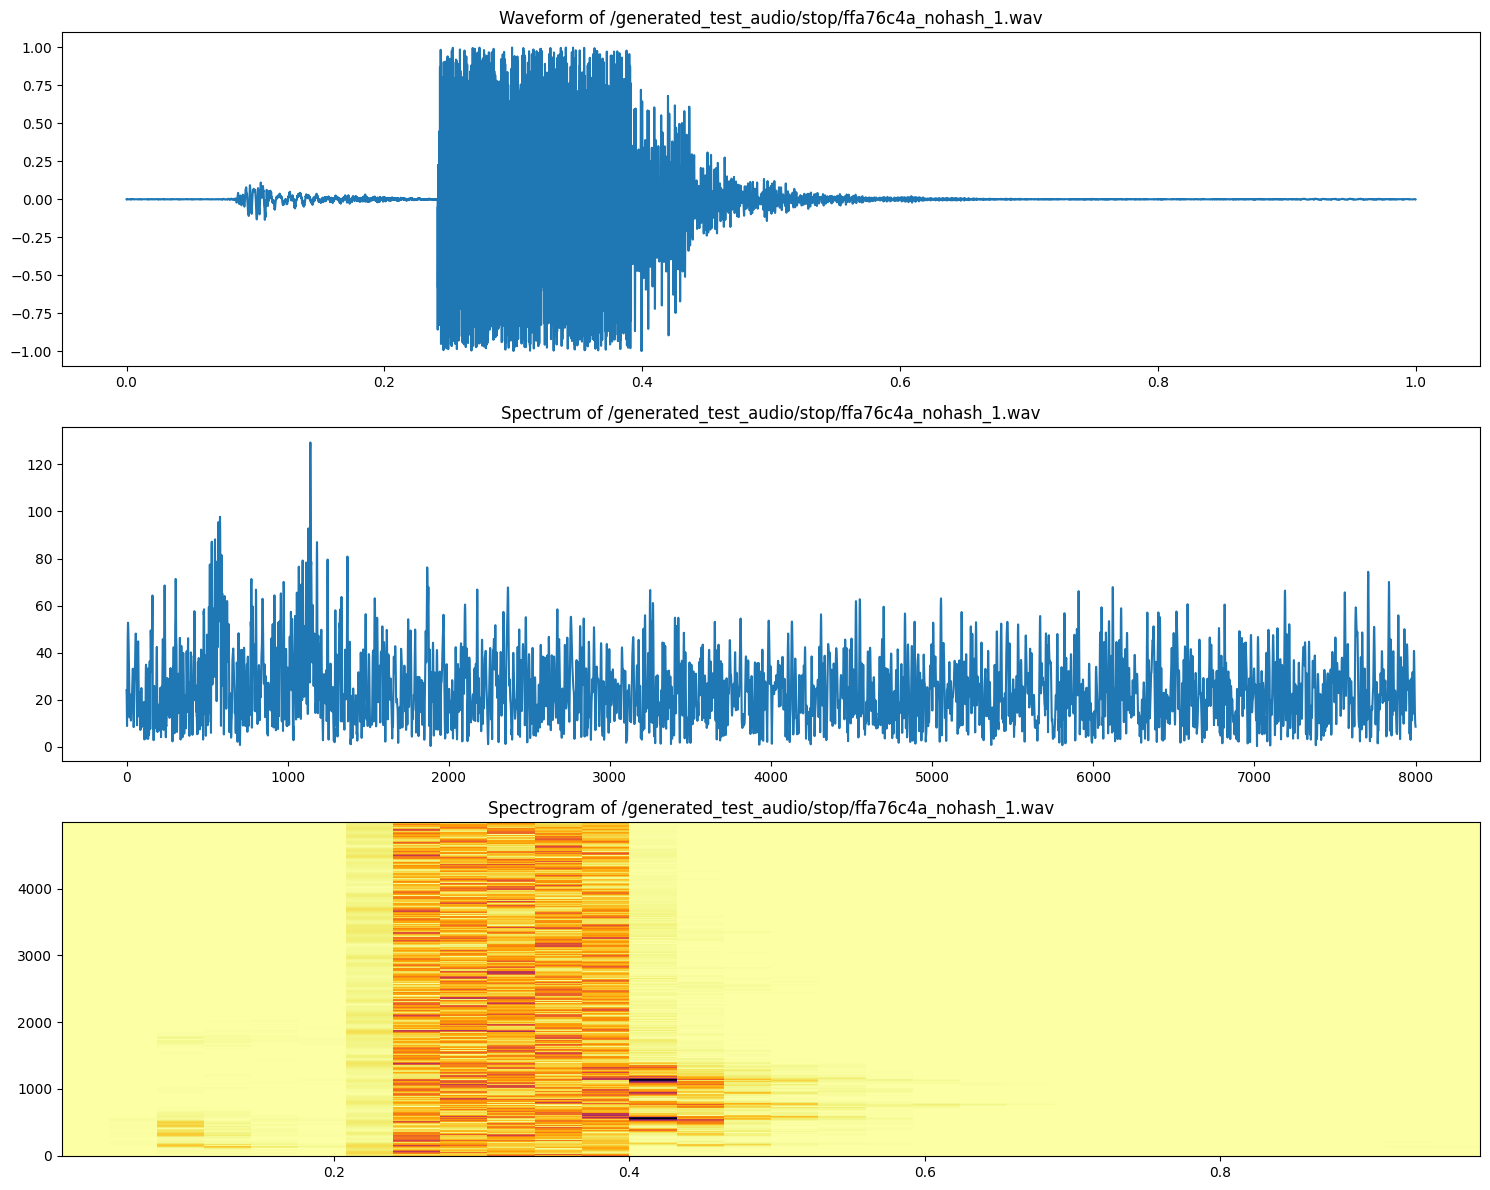

In [70]:
plot_audio_analysis(noised_wave, '',noised_wave_des)

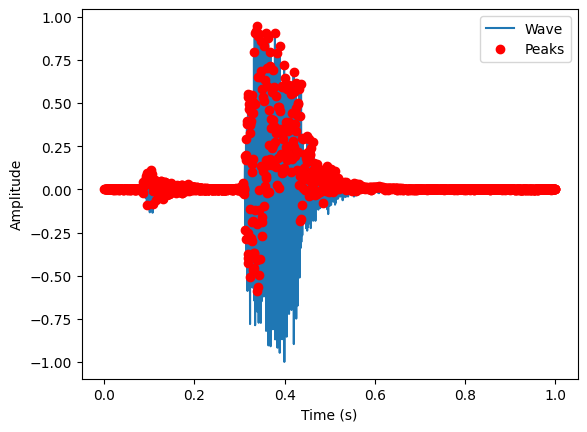

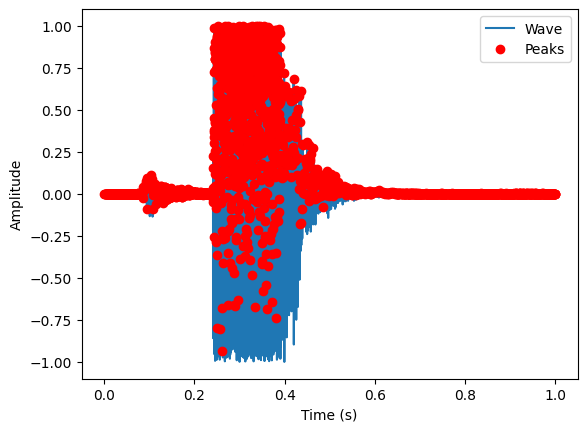

In [71]:
plot_peaks(test_wave)
plot_peaks(noised_wave)

# Running statistical tests to compare the noised, and orignial test data

In [74]:
wave_stats_noised, corr_noised, cov_noised = stat_analysis("/content/generated_test_audio")
wave_data_noised = wave_stats_noised["mean"]

<ipython-input-17-1812947a61d4>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = wave_stats_df.corr()
<ipython-input-17-1812947a61d4>:18: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = wave_stats_df.cov()


## Anderson Darling test for normal distribution

In [75]:
# test
print("Anderson-Darling test for testing samples: ")
print()
anderson_darling(wave_data_test)

# noised
print("Anderson-Darling test for noised testing samples: ")
print()
anderson_darling(wave_data_noised)

Anderson-Darling test for testing samples: 

Test Statistic:  529.3473190393315
Critical Values:  [0.575 0.654 0.785 0.916 1.089]
Significance Levels:  [15.  10.   5.   2.5  1. ]
The null hypothesis cannot be rejected. The data follows a normal distribution.
Anderson-Darling test for noised testing samples: 

Test Statistic:  271.8497262699359
Critical Values:  [0.575 0.654 0.785 0.916 1.089]
Significance Levels:  [15.  10.   5.   2.5  1. ]
The null hypothesis cannot be rejected. The data follows a normal distribution.


<ipython-input-26-b27b1a7bb805>:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if anderson_result.statistic > anderson_result.critical_values[anderson_result.significance_level == alpha]:


## Both follows normal dostribution

## Histograms for wave data statistics

Test samples: 



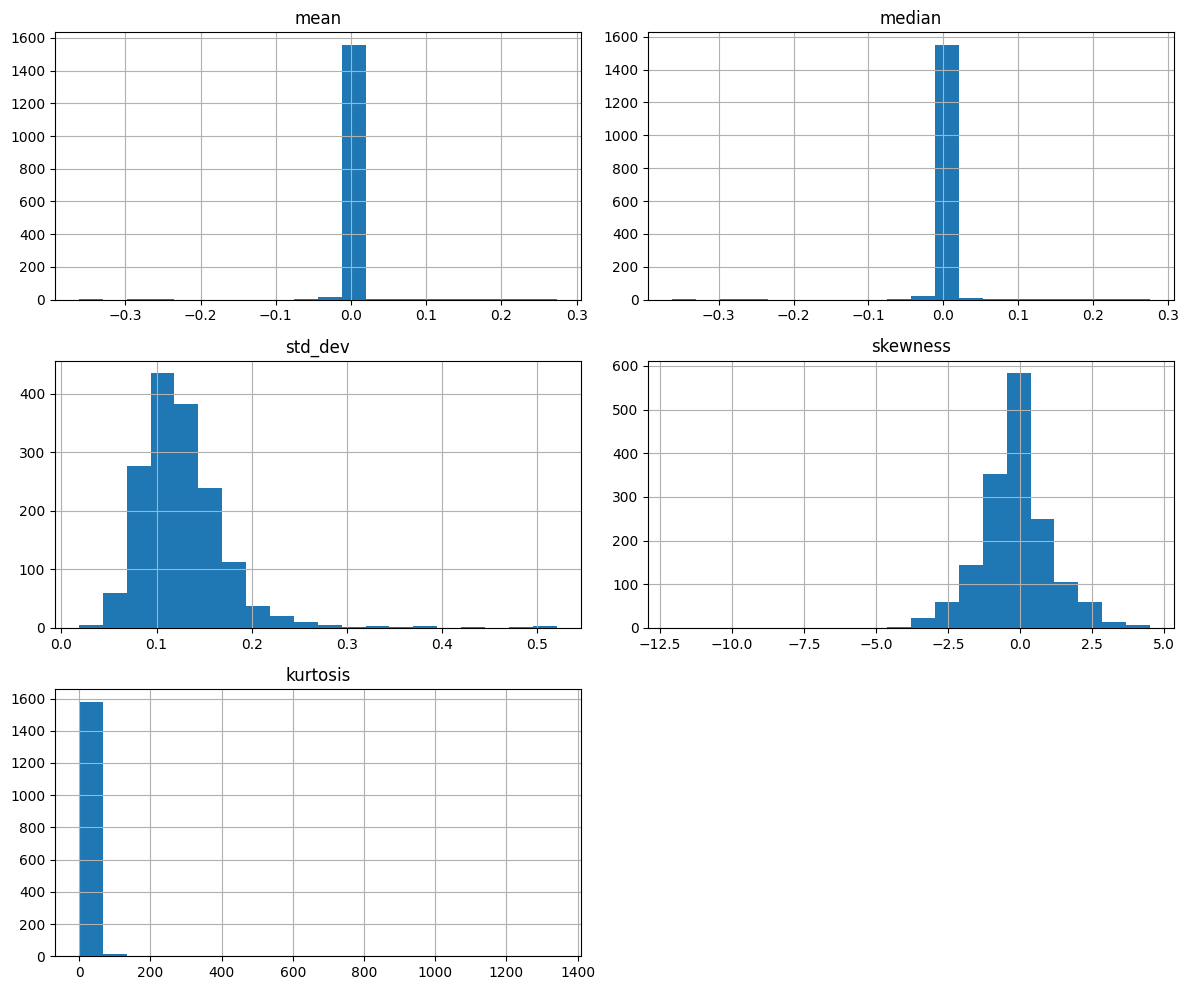


Noised test samples: 



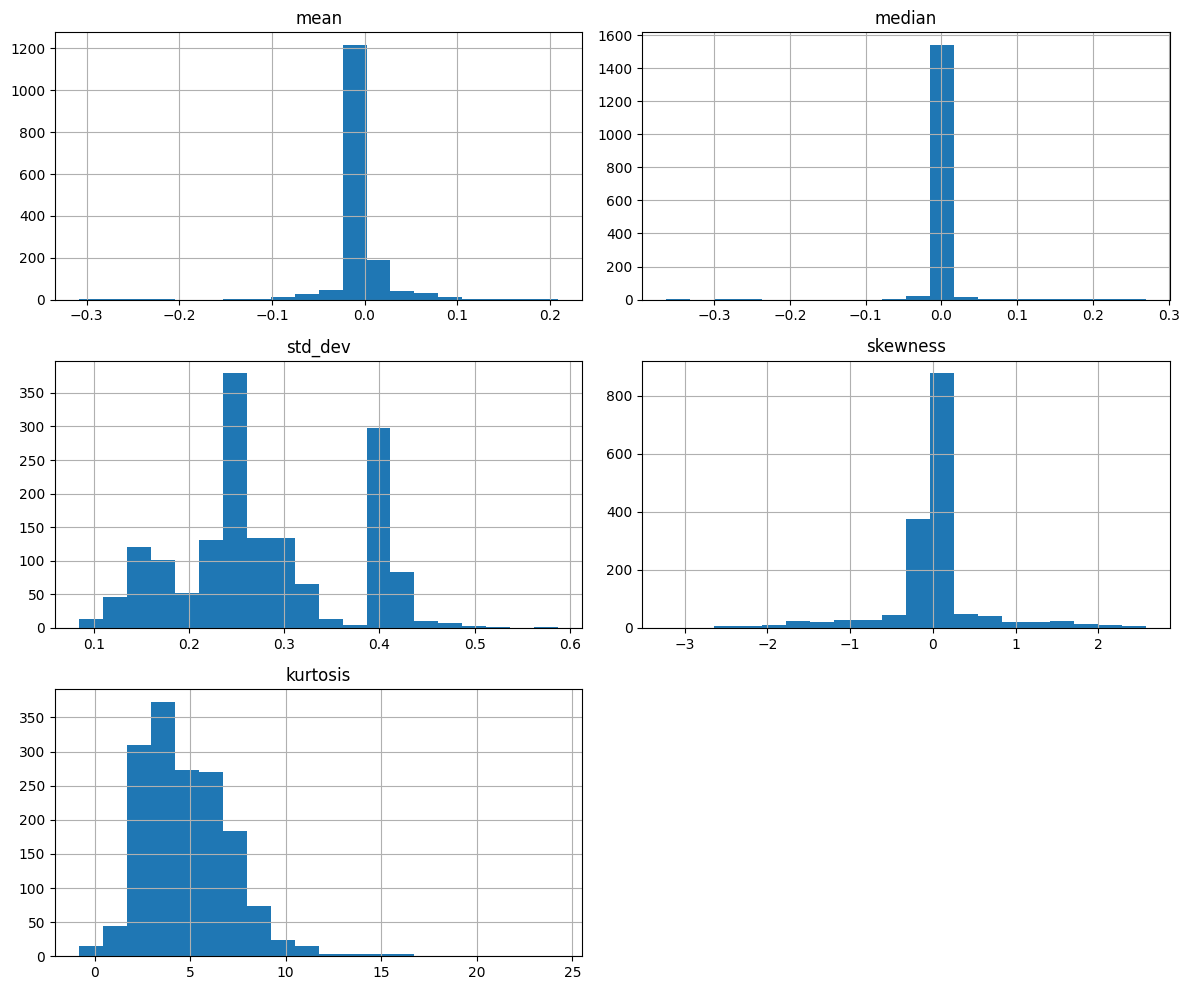

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Test samples: \n")
wave_stats_test.hist(column=["mean", "median", "std_dev", "skewness", "kurtosis"], figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

print("\nNoised test samples: \n")
wave_stats_noised.hist(column=["mean", "median", "std_dev", "skewness", "kurtosis"], figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

## Findings:
- Different mean: The noised data has a shifted center of mass compared to the original data. Depending on how the noise was added, this may or may not be significant.

- Different kurtosis: A change in kurtosis implies that the tail behavior and the presence of extreme values or outliers are different between the original and noised data.

- Different standard deviation: A change in standard deviation indicates that the dispersion or spread of the noised data is different from the original data. The data points in the noised data may be more spread out or more concentrated around the mean.

- Different skewness: A change in skewness means that the asymmetry of the distribution has changed. The noised data may have a more pronounced tail on one side compared to the original data.

- Median stays the same: The median remaining the same means that the middle value of the data has not changed, despite the changes in other aspects of the distribution.

# As it can be seen that adding the noise to continous chunks for 15% makes a huge change to the audio, and spectogram itself.

# Downloading the noised samples by zipping

In [ ]:
!zip -r "noised_test_audio.zip" "/content/generated_test_audio" 

# Strategy and justification

## Strategy : Changing the 15% of the timestamp with random noise. These 15% timestamp slice to change would also be random to create no patterns, and confuse the model more. It made changes to the mean, standard deviation, skewness, and kurtosis making files drastically change

## Justification: 
- For using random noise from a choice of many: If a singular noise is to be added, the model might pick still be able to predict correct output since it still keeps the certain pattern
- For changing 15% random slice of timestamp: To leave no no chance for the model to pick up patter, if it always changed at the same place, the model still might pick up the pattern